### Assignment - DS - Mechademy - Shubham Mahobia


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.express as px


##### Exploring the Dataset for analysis



In [3]:
df = pd.read_csv('data/data.csv')


In [4]:
df.head(20)


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.790000,NaN,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.790000,44.933333,35.921144,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.790000,45.000000,NaN,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.790000,45.000000,18.890000,...,4.476511,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50.0,40.0,19.89,46.0266666666667,19.2,44.500000,19.790000,44.933333,18.890000,...,17.000000,NaN,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,NaN
6,2016-01-11 18:00:00,60.0,50.0,19.89,45.7666666666667,19.2,44.500000,19.790000,44.900000,35.921144,...,17.000000,NaN,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60.0,50.0,19.8566666666667,45.56,19.2,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,NaN,40.0,19.79,45.5975,19.2,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,-32.098095,31.455702,31.455702
9,2016-01-11 18:30:00,70.0,40.0,19.8566666666667,46.09,19.23,44.400000,19.790000,44.863333,18.890000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,NaN,4.650000,3.089314,3.089314


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [6]:
df.describe()


,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [7]:
#Converting the columns into correct data type for further use
df['timestamp'] = pd.to_datetime(df['timestamp'])
numeric_columns = [
    'equipment_energy_consumption',
    'lighting_energy',
    'zone1_temperature', 'zone2_temperature', 'zone3_temperature',
    'zone4_temperature', 'zone5_temperature', 'zone6_temperature',
    'zone7_temperature', 'zone8_temperature', 'zone9_temperature',
    'zone1_humidity', 'zone2_humidity', 'zone3_humidity',
    'zone4_humidity', 'zone5_humidity', 'zone6_humidity',
    'zone7_humidity', 'zone8_humidity', 'zone9_humidity',
    'outdoor_temperature', 'outdoor_humidity', 'atmospheric_pressure',
    'wind_speed', 'visibility_index', 'dew_point',
    'random_variable1', 'random_variable2'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [8]:
missing_values = df.isnull().sum()
print(missing_values)



timestamp                         0
equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [9]:
#As there are null values in the output column[equipment_energy_consumption = 844] as well so to 
#match the count of the output column with the input column we will drop the null values

#Reason - If the output column has null values then the model will not be able to predict the output for the input data

# Drop rows where equipment_energy_consumption is null
df.dropna(subset=['equipment_energy_consumption'], inplace=True)

In [10]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
lighting_energy         806
zone1_temperature       891
zone1_humidity          843
zone2_temperature       876
zone2_humidity          823
zone3_temperature       757
zone3_humidity          818
zone4_temperature       771
zone4_humidity          739
zone5_temperature       786
zone5_humidity          749
zone6_temperature       799
zone6_humidity          796
zone7_temperature       738
zone7_humidity          765
zone8_temperature       801
zone8_humidity          742
zone9_temperature       728
zone9_humidity          832
outdoor_temperature     766
atmospheric_pressure    796
outdoor_humidity        757
wind_speed              779
visibility_index        768
dew_point               768
random_variable1        783
random_variable2        778
dtype: int64


In [11]:
# Outlier Capping for the Target Variable (Ensuring Lower Bound >= 10)

target_col = 'equipment_energy_consumption'

q1 = df[target_col].quantile(0.25)
q3 = df[target_col].quantile(0.75)
iqr = q3 - q1
calculated_lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Apply the domain knowledge: minimum consumption is 10
effective_lower_bound = max(10, calculated_lower_bound)

print(f"\nOutlier Capping for '{target_col}' (with lower bound >= 10):")
print(f"  Q1: {q1:.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}")
print(f"  Calculated Lower Bound (Q1 - 1.5*IQR): {calculated_lower_bound:.2f}")
print(f"  Effective Lower Bound (max(10, calculated)): {effective_lower_bound:.2f}")
print(f"  Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}")

original_values = df[target_col].copy() # To compare and count outliers

# Cap outliers using the effective lower bound
df[target_col] = df[target_col].clip(lower=effective_lower_bound, upper=upper_bound)

outliers_capped_lower = (original_values < effective_lower_bound).sum()
outliers_capped_upper = (original_values > upper_bound).sum()
total_outliers_capped = outliers_capped_lower + outliers_capped_upper

if total_outliers_capped > 0:
    print(f"Capped {total_outliers_capped} outliers in '{target_col}'.")
    print(f"  Values below {effective_lower_bound:.2f} capped: {outliers_capped_lower}")
    print(f"  Values above {upper_bound:.2f} capped: {outliers_capped_upper}")
else:
    print(f"No outliers found/capped in '{target_col}'.")

# Display the description after capping
print("\nDescription of target variable after outlier capping:")
print(df[target_col].describe())


Outlier Capping for 'equipment_energy_consumption' (with lower bound >= 10):
  Q1: 50.00, Q3: 100.00, IQR: 50.00
  Calculated Lower Bound (Q1 - 1.5*IQR): -25.00
  Effective Lower Bound (max(10, calculated)): 10.00
  Upper Bound (Q3 + 1.5*IQR): 175.00
Capped 2187 outliers in 'equipment_energy_consumption'.
  Values below 10.00 capped: 314
  Values above 175.00 capped: 1873

Description of target variable after outlier capping:
count    15945.000000
mean        77.947005
std         45.022100
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max        175.000000
Name: equipment_energy_consumption, dtype: float64


In [12]:
zone_columns = []
for i in range(1, 10): # Zones 1 to 9
    zone_columns.append(f'zone{i}_temperature')
    zone_columns.append(f'zone{i}_humidity')

for col in zone_columns:
    if col in df.columns: # Check if the column exists in the DataFrame,
        # For outlier calculation, it's better to work with non-null values
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        original_values = df[col].copy() # To compare and count outliers
        
        # Cap outliers
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        
        outliers_capped_lower = (original_values < lower_bound).sum()
        outliers_capped_upper = (original_values > upper_bound).sum()
        total_outliers_capped = outliers_capped_lower + outliers_capped_upper
        
        if total_outliers_capped > 0:
            print(f"Capped {total_outliers_capped} outliers in '{col}'.")
            print(f"  Lower bound: {lower_bound:.2f}, {outliers_capped_lower} values capped.")
            print(f"  Upper bound: {upper_bound:.2f}, {outliers_capped_upper} values capped.")
        else:
            print(f"No outliers found/capped in '{col}'.")
            
# Display a sample of the dataframe to verify
print("\\nSample of DataFrame after outlier capping:")
print(df[zone_columns].head())

# You might want to check for NaNs again if capping introduced any issues or if they were present
print("\\nMissing values after outlier capping for zone columns:")

Capped 601 outliers in 'zone1_temperature'.
  Lower bound: 18.10, 405 values capped.
  Upper bound: 24.50, 196 values capped.
Capped 506 outliers in 'zone1_humidity'.
  Lower bound: 28.83, 309 values capped.
  Upper bound: 50.70, 197 values capped.
Capped 546 outliers in 'zone2_temperature'.
  Lower bound: 15.32, 147 values capped.
  Upper bound: 24.07, 399 values capped.
Capped 593 outliers in 'zone2_humidity'.
  Lower bound: 29.89, 419 values capped.
  Upper bound: 50.86, 174 values capped.
Capped 361 outliers in 'zone3_temperature'.
  Lower bound: 17.19, 160 values capped.
  Upper bound: 26.10, 201 values capped.
Capped 466 outliers in 'zone3_humidity'.
  Lower bound: 29.42, 323 values capped.
  Upper bound: 48.64, 143 values capped.
Capped 542 outliers in 'zone4_temperature'.
  Lower bound: 16.07, 387 values capped.
  Upper bound: 24.58, 155 values capped.
Capped 496 outliers in 'zone4_humidity'.
  Lower bound: 25.64, 324 values capped.
  Upper bound: 51.12, 172 values capped.
Capp

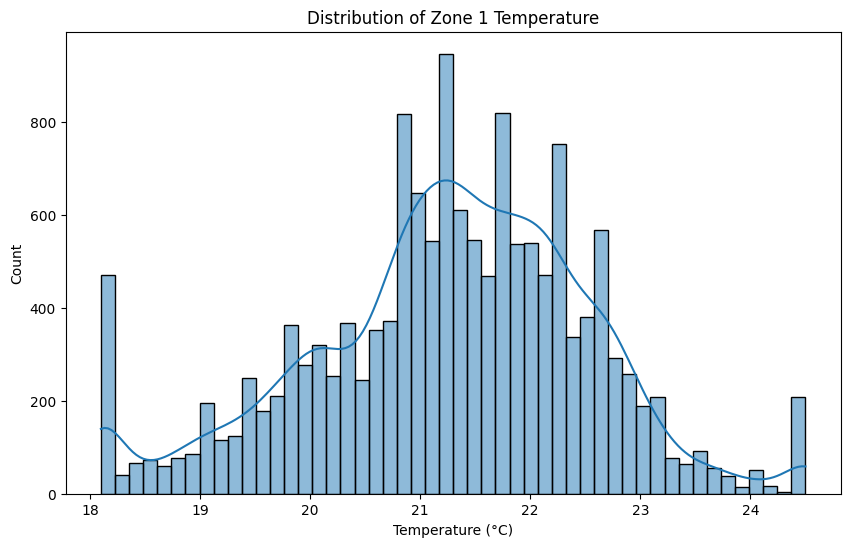

In [13]:


# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='zone1_temperature', kde=True)
plt.title('Distribution of Zone 1 Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.show()


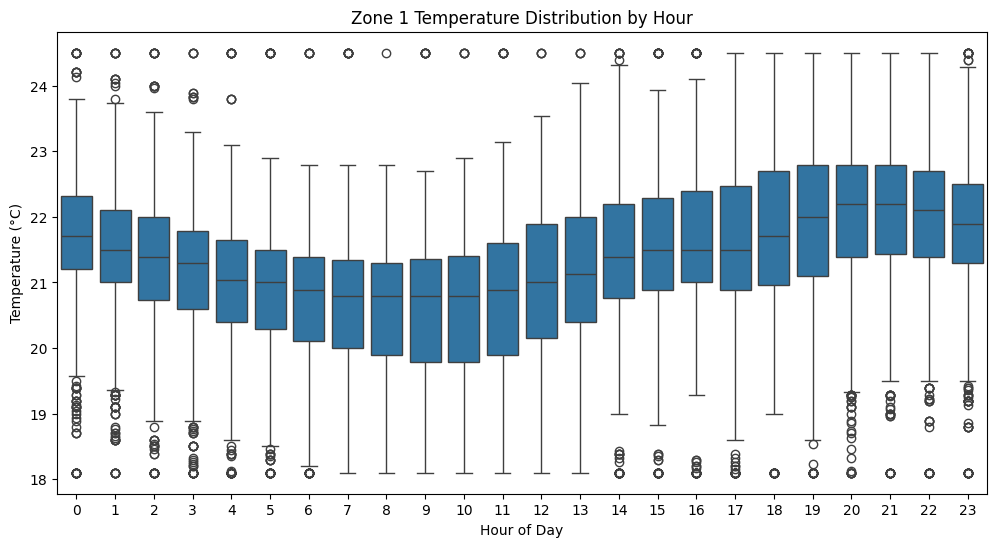

In [14]:
df['hour'] = df['timestamp'].dt.hour

# Hourly temperature patterns
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='zone1_temperature', data=df)
plt.title('Zone 1 Temperature Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (°C)')
plt.show()

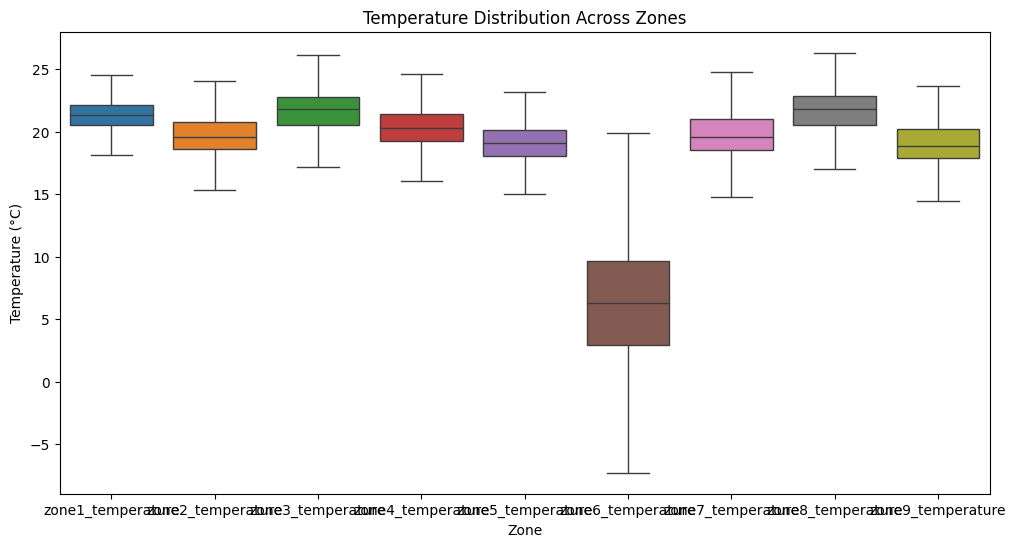

In [15]:
#Exploring different ranges of temprature in different zones

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[[f'zone{i}_temperature' for i in range(1, 10)]])
plt.title('Temperature Distribution Across Zones')
plt.xlabel('Zone')
plt.ylabel('Temperature (°C)')
plt.show()


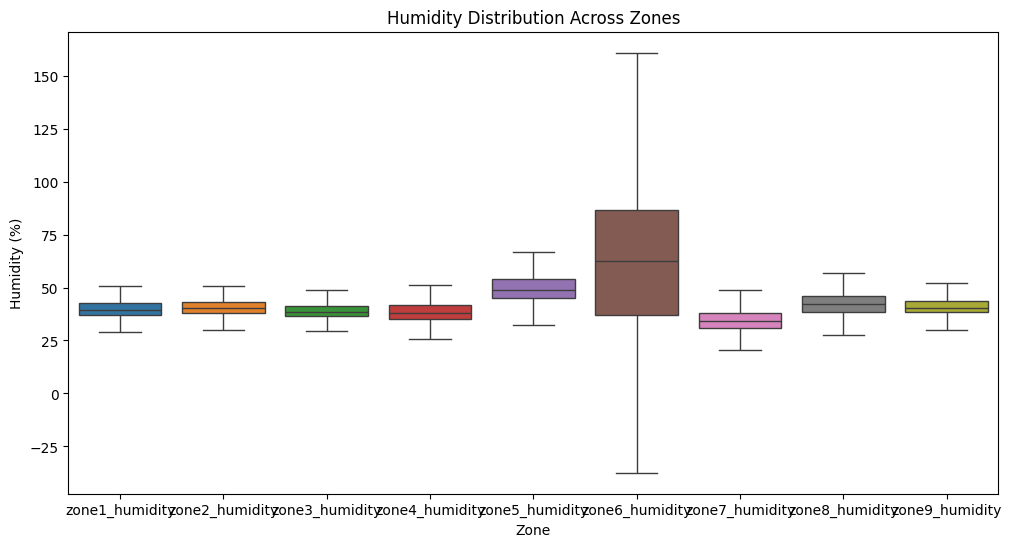

In [16]:
#Exploring different humidity levels in different zones 

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[[f'zone{i}_humidity' for i in range(1, 10)]])
plt.title('Humidity Distribution Across Zones')
plt.xlabel('Zone')
plt.ylabel('Humidity (%)')
plt.show()

In [17]:
#Now handling the columns with missing values in it - 
#For temprature we are using hourly mean as
temperature_cols = [f'zone{i}_temperature' for i in range(1, 10)] + ['outdoor_temperature']
for col in temperature_cols:
        hourly_mean = df.groupby('hour')[col].transform('mean')
        df[col] = df[col].fillna(hourly_mean)
        df[col] = df[col].fillna(df[col].mean())

In [18]:
#Now same for the humidity - Columns -
# Remove invalid values (By observation the humiditiy data is provided in the percentage(%) 
# as mentioned in the data description file but some values are negative 
# as well which makes the data invalid so for that imputing those values 
# the median value - We can remove it as well but the issue the values 
# are in large number and will be large data loss for training)
humidity_cols = [f'zone{i}_humidity' for i in range(1, 10)] + ['outdoor_humidity']
for col in humidity_cols:
        # Remove invalid values
        df[col] = df[col].mask((df[col] < 0) | (df[col] > 100))
        hourly_mean = df.groupby('hour')[col].transform('mean')
        df[col] = df[col].fillna(hourly_mean)
        df[col] = df[col].fillna(df[col].mean())
        df[col] = df[col].clip(0, 100)

In [19]:
#for these columns time does not take much importance so we can directly replace Nan value with mean
weather_cols = ['atmospheric_pressure', 'wind_speed', 'visibility_index', 'dew_point']
for col in weather_cols:
        df[col] = df[col].fillna(df[col].mean())

count    15139.000000
mean         3.919199
std         14.675775
min        -86.002966
25%          0.000000
50%          0.000000
75%          0.000000
max         86.002966
Name: lighting_energy, dtype: float64


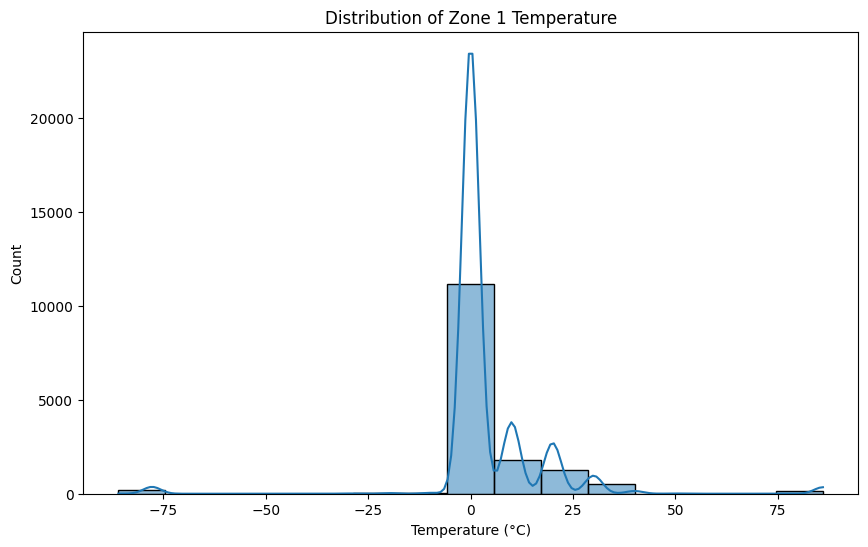

In [20]:
print(df['lighting_energy'].describe())
# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lighting_energy', kde=True)
plt.title('Distribution of Zone 1 Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.show()

In [21]:
df.loc[df['lighting_energy'] < 0, 'lighting_energy'] = np.nan  # Mark as missing as the consuption cannot be negative 

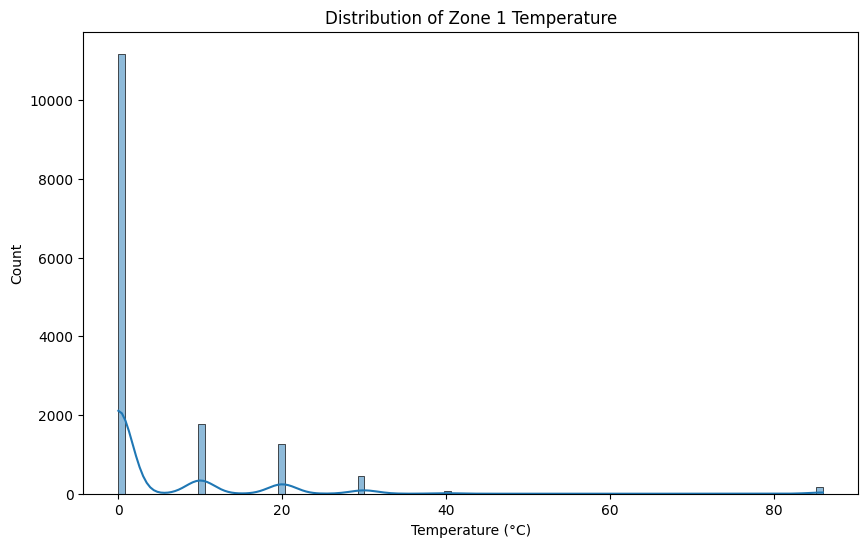

In [22]:
# Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lighting_energy', kde=True)
plt.title('Distribution of Zone 1 Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.show()

In [23]:
median_value = df['lighting_energy'].median()
df['lighting_energy'] = df['lighting_energy'].fillna(median_value)

In [24]:
missing_values = df.isnull().sum()
print(missing_values)
#Now only the random value have missing data rest of the data is fixed

timestamp                         0
equipment_energy_consumption      0
lighting_energy                   0
zone1_temperature                 0
zone1_humidity                    0
zone2_temperature                 0
zone2_humidity                    0
zone3_temperature                 0
zone3_humidity                    0
zone4_temperature                 0
zone4_humidity                    0
zone5_temperature                 0
zone5_humidity                    0
zone6_temperature                 0
zone6_humidity                    0
zone7_temperature                 0
zone7_humidity                    0
zone8_temperature                 0
zone8_humidity                    0
zone9_temperature                 0
zone9_humidity                    0
outdoor_temperature               0
atmospheric_pressure              0
outdoor_humidity                  0
wind_speed                        0
visibility_index                  0
dew_point                         0
random_variable1            

In [25]:
print(df['equipment_energy_consumption'].corr(df['zone1_temperature']))
print(df['equipment_energy_consumption'].corr(df['zone2_temperature']))
print(df['equipment_energy_consumption'].corr(df['zone3_temperature']))
print(df['equipment_energy_consumption'].corr(df['zone4_temperature']))
print(df['equipment_energy_consumption'].corr(df['zone5_temperature']))
print(df['equipment_energy_consumption'].corr(df['zone6_temperature']))
print(df['equipment_energy_consumption'].corr(df['zone7_temperature']))
print(df['equipment_energy_consumption'].corr(df['zone8_temperature']))
print(df['equipment_energy_consumption'].corr(df['zone9_temperature']))

0.15489676730728275
0.20471548721369295
0.1507862916398422
0.11581685946842711
0.08435649443330522
0.16489105648671817
0.08151646649699118
0.13044292009826655
0.06570339141389667


In [26]:
print(df['equipment_energy_consumption'].corr(df['zone1_humidity']))
print(df['equipment_energy_consumption'].corr(df['zone2_humidity']))
print(df['equipment_energy_consumption'].corr(df['zone3_humidity']))
print(df['equipment_energy_consumption'].corr(df['zone4_humidity']))
print(df['equipment_energy_consumption'].corr(df['zone5_humidity']))
print(df['equipment_energy_consumption'].corr(df['zone6_humidity']))
print(df['equipment_energy_consumption'].corr(df['zone7_humidity']))
print(df['equipment_energy_consumption'].corr(df['zone8_humidity']))
print(df['equipment_energy_consumption'].corr(df['zone9_humidity']))

0.08394777590877765
-0.07016957477525781
0.008706803718363595
-0.015324242493770318
-0.0050059402857038394
-0.1375745189396246
-0.09657431843718062
-0.151960267693591
-0.11256793225594168


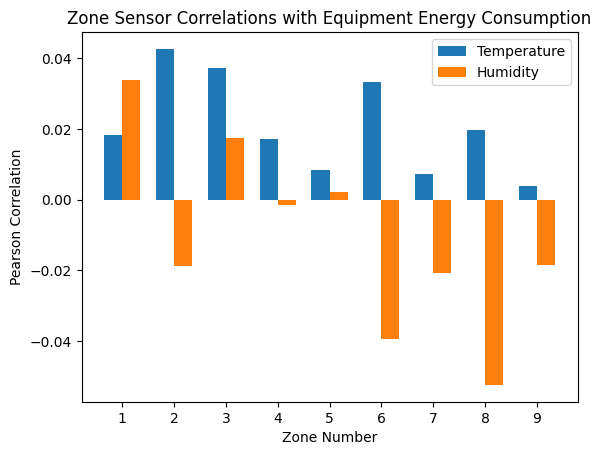

In [27]:
# Data
zones = np.arange(1, 10)
temp_corrs = np.array([
    0.01830083300327231,
    0.04264834203286901,
    0.0373572314775246,
    0.01714997109946124,
    0.008278714373089083,
    0.03318263430202966,
    0.007368143299545808,
    0.01971775783669024,
    0.003888005324142666
])
hum_corrs = np.array([
    0.03386395744282072,
    -0.018638657027427324,
    0.017377712023717993,
    -0.0014865486460398673,
    0.002028968251712425,
    -0.039365843736999584,
    -0.020844023690514635,
    -0.0524208815752992,
    -0.018594157199504958
])

# Plot
width = 0.35
fig, ax = plt.subplots()
ax.bar(zones - width/2, temp_corrs, width, label='Temperature')
ax.bar(zones + width/2, hum_corrs, width, label='Humidity')

ax.set_xlabel("Zone Number")
ax.set_ylabel("Pearson Correlation")
ax.set_title("Zone Sensor Correlations with Equipment Energy Consumption")
ax.set_xticks(zones)
ax.legend()

plt.show()

In [28]:
## As we can see that the zone 5, 7 , 9 doesn't contribute much in the energy consuption as these are not much related to the manufacturing - 
# Zone 5 - Raw Material Storage
# Zone 7 - Office Space
# Zone 9 - Staff Area

In [29]:
outdoor_features = [
    "outdoor_temperature",
    "outdoor_humidity",
    "atmospheric_pressure",
    "wind_speed",
    "visibility_index",
    "dew_point"
]

# Build a Series of correlation values
outdoor_corrs = pd.Series(
    {feat: df["equipment_energy_consumption"].corr(df[feat]) 
     for feat in outdoor_features},
    name="corr_with_energy"
)

# Sort by magnitude (absolute value), descending
outdoor_corrs = outdoor_corrs.reindex(
    outdoor_corrs.abs().sort_values(ascending=False).index
)

print(outdoor_corrs)


outdoor_humidity       -0.201223
outdoor_temperature     0.095856
atmospheric_pressure   -0.035899
wind_speed              0.035324
dew_point               0.024122
visibility_index       -0.004654
Name: corr_with_energy, dtype: float64


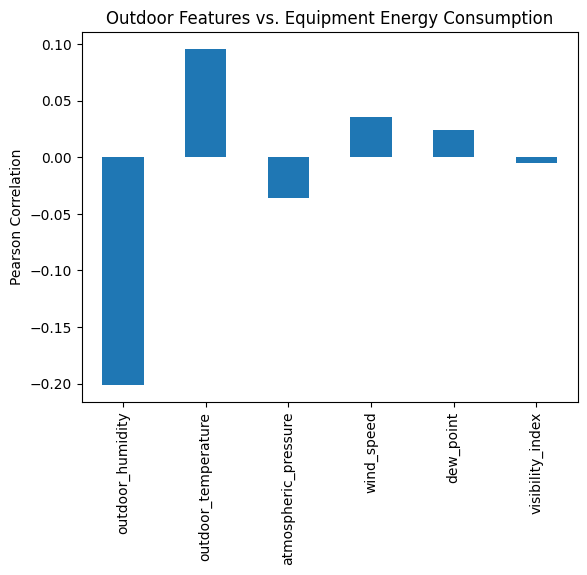

In [30]:
plt.figure()
outdoor_corrs.plot.bar()
plt.ylabel("Pearson Correlation")
plt.title("Outdoor Features vs. Equipment Energy Consumption")
plt.show()

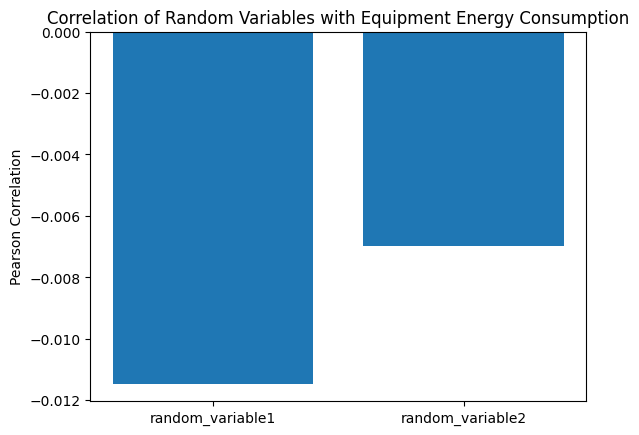

In [31]:


# List your features
rand_feats = ["random_variable1", "random_variable2"]

# Compute correlations
corrs = [
    df["equipment_energy_consumption"].corr(df[feat])
    for feat in rand_feats
]

# Plot
plt.figure()
plt.bar(rand_feats, corrs)
plt.ylabel("Pearson Correlation")
plt.title("Correlation of Random Variables with Equipment Energy Consumption")
plt.show()


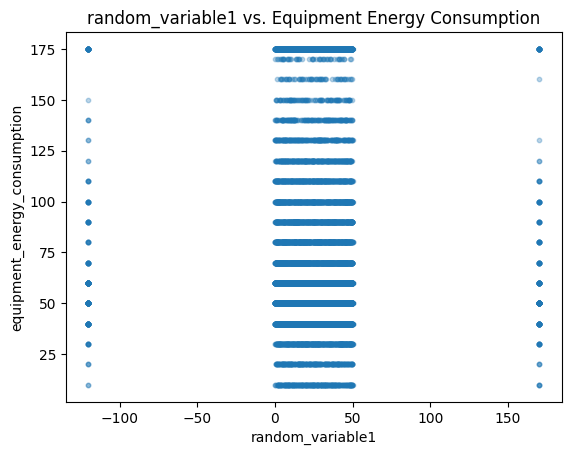

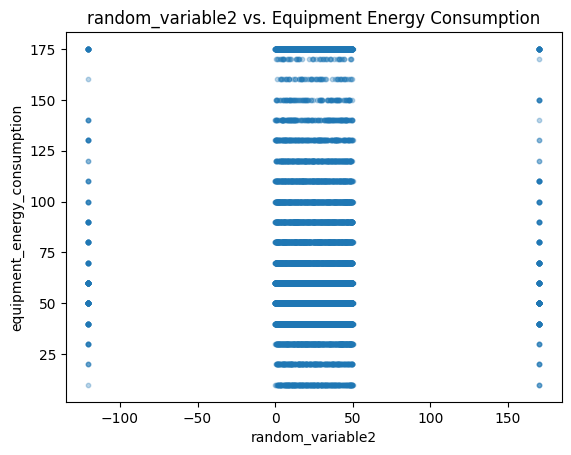

In [32]:
import matplotlib.pyplot as plt

for feat in ["random_variable1","random_variable2"]:
    plt.figure()
    plt.scatter(df[feat], df["equipment_energy_consumption"], s=10, alpha=0.3)
    plt.title(f"{feat} vs. Equipment Energy Consumption")
    plt.xlabel(feat)
    plt.ylabel("equipment_energy_consumption")
    plt.show()


In [33]:
#Given their near-zero correlation and expected randomness, 
# it’s safe  from a modeling standpoint to exclude 
# both random variables. They won’t help your
#  model generalize and may even introduce unnecessary variance.

In [34]:
df['random_variable1'].describe()

count    15162.000000
mean        24.853901
std         26.238947
min       -120.170177
25%         12.196086
50%         24.895908
75%         37.962575
max        170.156325
Name: random_variable1, dtype: float64

In [35]:
df['random_variable2'].describe()

count    15167.000000
mean        25.158975
std         25.505820
min       -120.409590
25%         12.231442
50%         24.897765
75%         38.004644
max        170.329617
Name: random_variable2, dtype: float64

In [36]:
df['equipment_energy_consumption'].describe()

count    15945.000000
mean        77.947005
std         45.022100
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max        175.000000
Name: equipment_energy_consumption, dtype: float64

In [37]:
# Remove outliers for random variables using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for both random variables
df_cleaned = remove_outliers(df, 'random_variable1')
df_cleaned = remove_outliers(df_cleaned, 'random_variable2')

# Print the shape before and after cleaning
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

# Display summary statistics of cleaned data
print("\nSummary statistics after removing outliers:")
print("\nRandom Variable 1:")
print(df_cleaned['random_variable1'].describe())
print("\nRandom Variable 2:")
print(df_cleaned['random_variable2'].describe())


Original shape: (15945, 30)
Shape after removing outliers: (13810, 30)

Summary statistics after removing outliers:

Random Variable 1:
count    13810.000000
mean        24.990809
std         14.562543
min          0.006033
25%         12.452172
50%         24.891900
75%         37.735274
max         49.996530
Name: random_variable1, dtype: float64

Random Variable 2:
count    13810.000000
mean        24.990809
std         14.562543
min          0.006033
25%         12.452172
50%         24.891900
75%         37.735274
max         49.996530
Name: random_variable2, dtype: float64


In [38]:
# Fill NaN values with median for random variables
df_cleaned['random_variable1'] = df_cleaned['random_variable1'].fillna(df_cleaned['random_variable1'].median())
df_cleaned['random_variable2'] = df_cleaned['random_variable2'].fillna(df_cleaned['random_variable2'].median())

# Print summary statistics to verify
print("\nSummary statistics after filling NaN values:")
print("\nRandom Variable 1:")
print(df_cleaned['random_variable1'].describe())
print("\nRandom Variable 2:")
print(df_cleaned['random_variable2'].describe())



Summary statistics after filling NaN values:

Random Variable 1:
count    13810.000000
mean        24.990809
std         14.562543
min          0.006033
25%         12.452172
50%         24.891900
75%         37.735274
max         49.996530
Name: random_variable1, dtype: float64

Random Variable 2:
count    13810.000000
mean        24.990809
std         14.562543
min          0.006033
25%         12.452172
50%         24.891900
75%         37.735274
max         49.996530
Name: random_variable2, dtype: float64


<Axes: xlabel='zone1_temperature', ylabel='equipment_energy_consumption'>

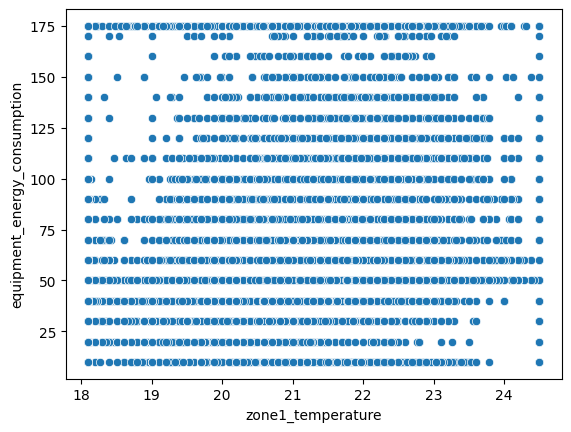

In [39]:
sns.scatterplot(x='zone1_temperature', y='equipment_energy_consumption', data=df)

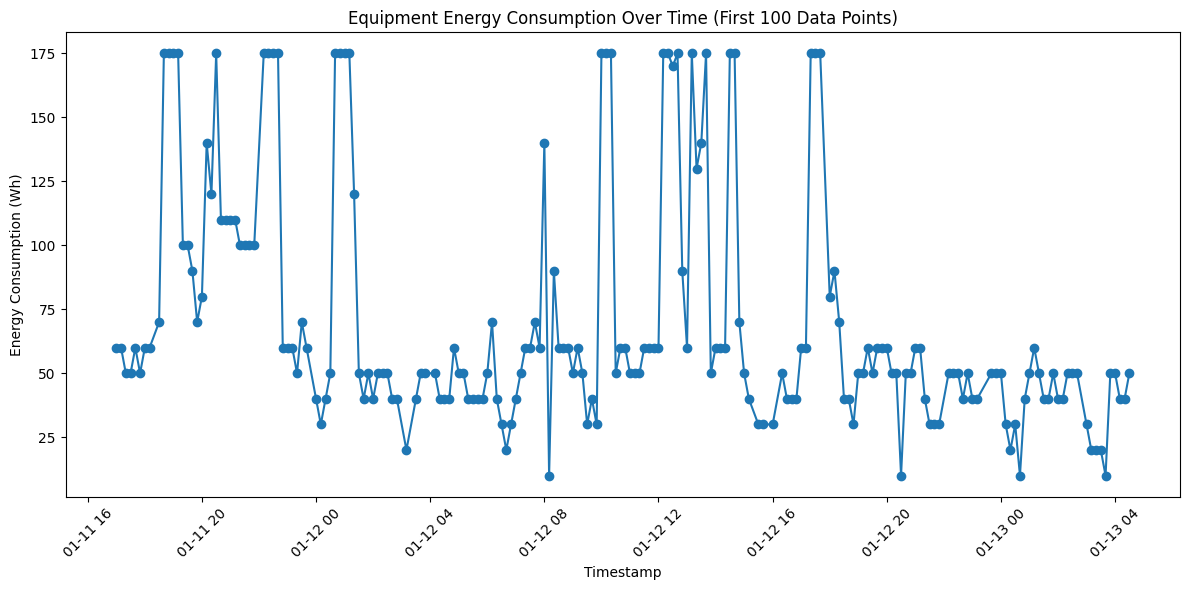

In [40]:
# Plot energy consumption against time for a short period (first 100 data points)
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'].iloc[:200], df['equipment_energy_consumption'].iloc[:200], marker='o')
plt.title('Equipment Energy Consumption Over Time (First 100 Data Points)')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


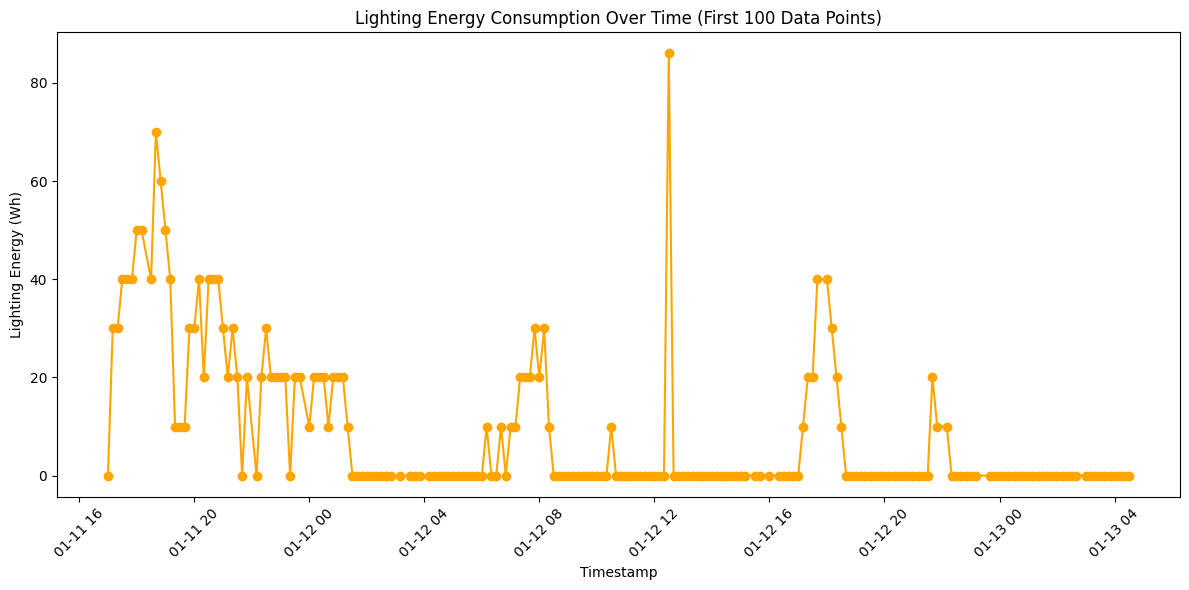

In [41]:
# Plot lighting energy against time for a short period (first 100 data points)
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'].iloc[:200], df['lighting_energy'].iloc[:200], marker='o', color='orange')
plt.title('Lighting Energy Consumption Over Time (First 100 Data Points)')
plt.xlabel('Timestamp')
plt.ylabel('Lighting Energy (Wh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


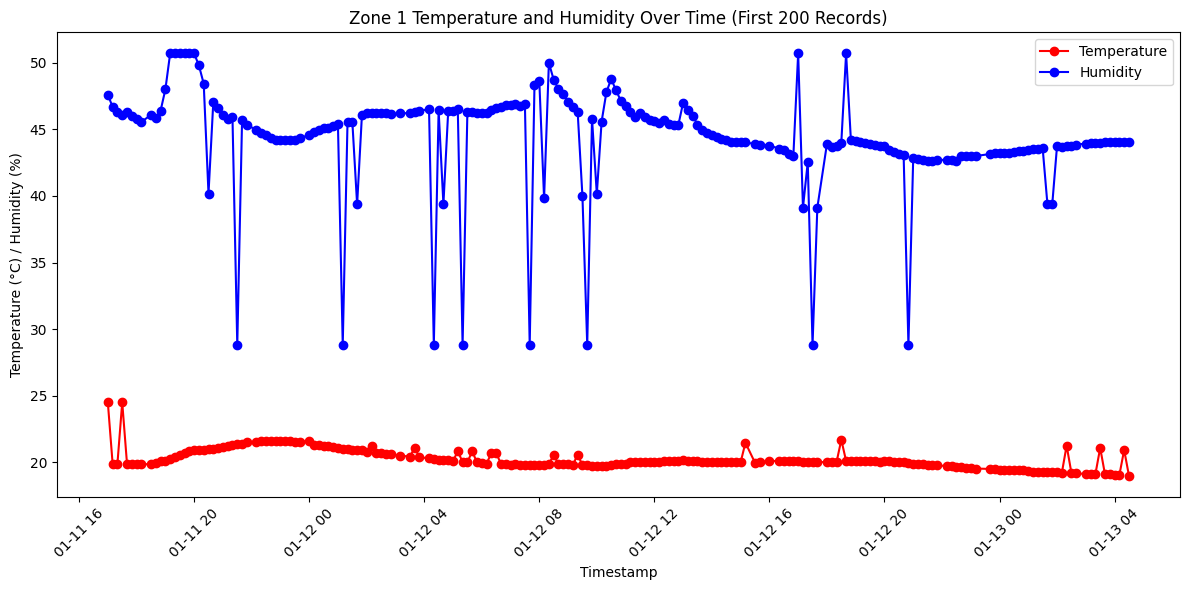

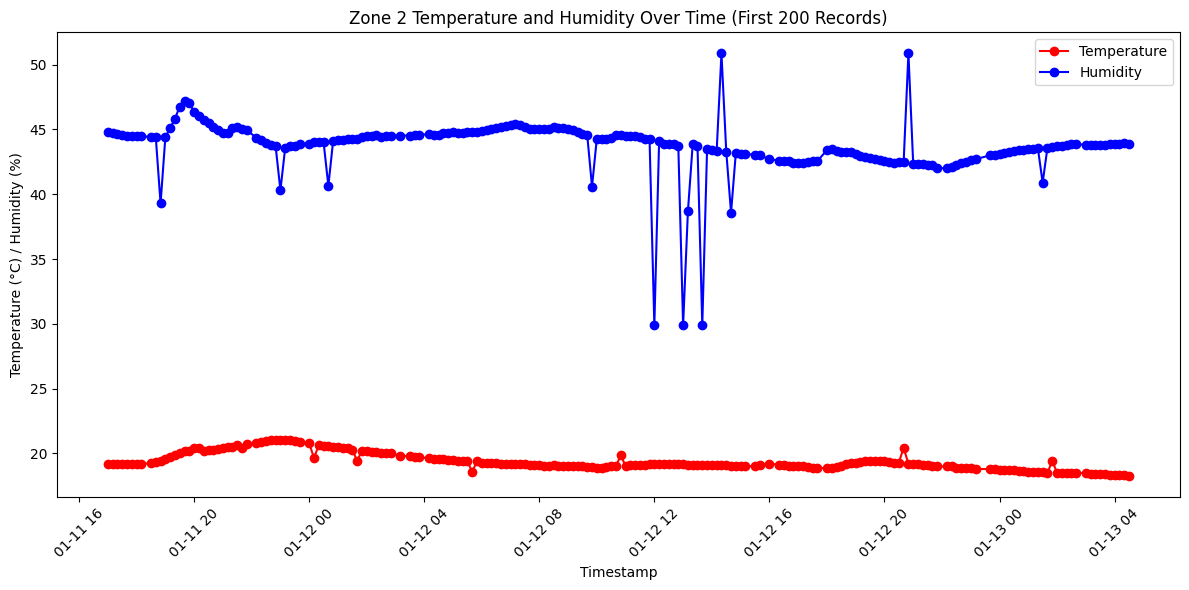

In [42]:
# Plot temperature and humidity for zone 1 against time
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'].iloc[:200], df['zone1_temperature'].iloc[:200], marker='o', color='red', label='Temperature')
plt.plot(df['timestamp'].iloc[:200], df['zone1_humidity'].iloc[:200], marker='o', color='blue', label='Humidity')
plt.title('Zone 1 Temperature and Humidity Over Time (First 200 Records)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C) / Humidity (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot temperature and humidity for zone 2 against time
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'].iloc[:200], df['zone2_temperature'].iloc[:200], marker='o', color='red', label='Temperature')
plt.plot(df['timestamp'].iloc[:200], df['zone2_humidity'].iloc[:200], marker='o', color='blue', label='Humidity')
plt.title('Zone 2 Temperature and Humidity Over Time (First 200 Records)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C) / Humidity (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation between lighting energy and equipment energy consumption: 0.168


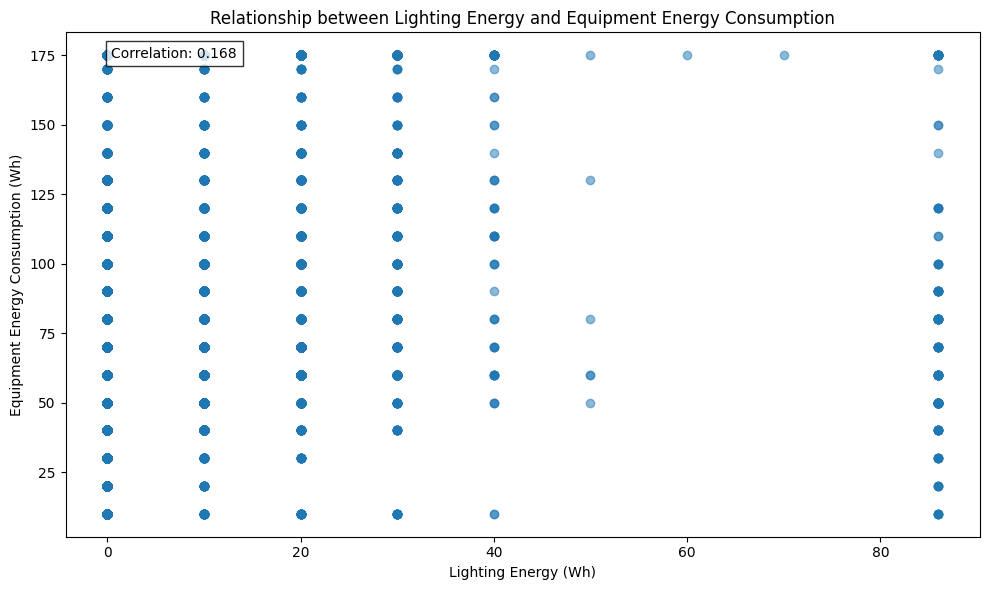

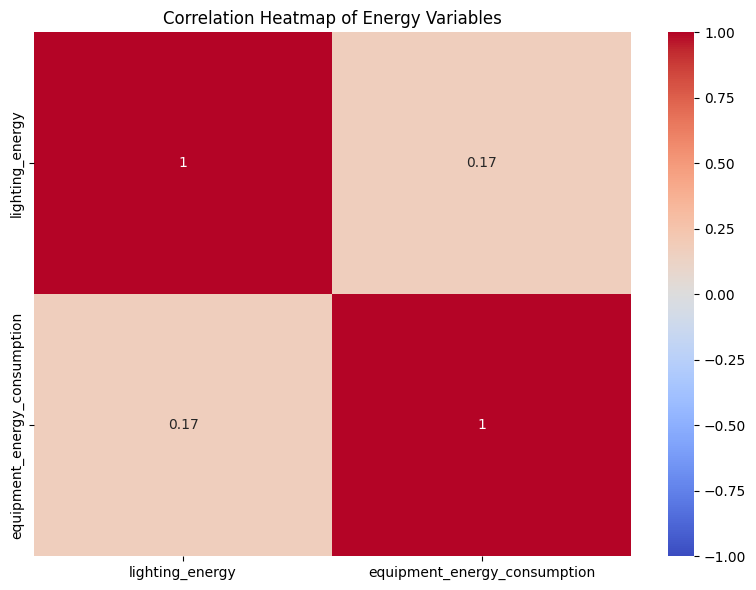

In [43]:
# Calculate correlation between lighting energy and equipment energy consumption
correlation = df['lighting_energy'].corr(df['equipment_energy_consumption'])
print(f"Correlation between lighting energy and equipment energy consumption: {correlation:.3f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['lighting_energy'], df['equipment_energy_consumption'], alpha=0.5)
plt.title('Relationship between Lighting Energy and Equipment Energy Consumption')
plt.xlabel('Lighting Energy (Wh)')
plt.ylabel('Equipment Energy Consumption (Wh)')

# Add correlation coefficient as text on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Create a heatmap of correlations between energy-related variables
energy_vars = ['lighting_energy', 'equipment_energy_consumption']
correlation_matrix = df[energy_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Energy Variables')
plt.tight_layout()
plt.show()


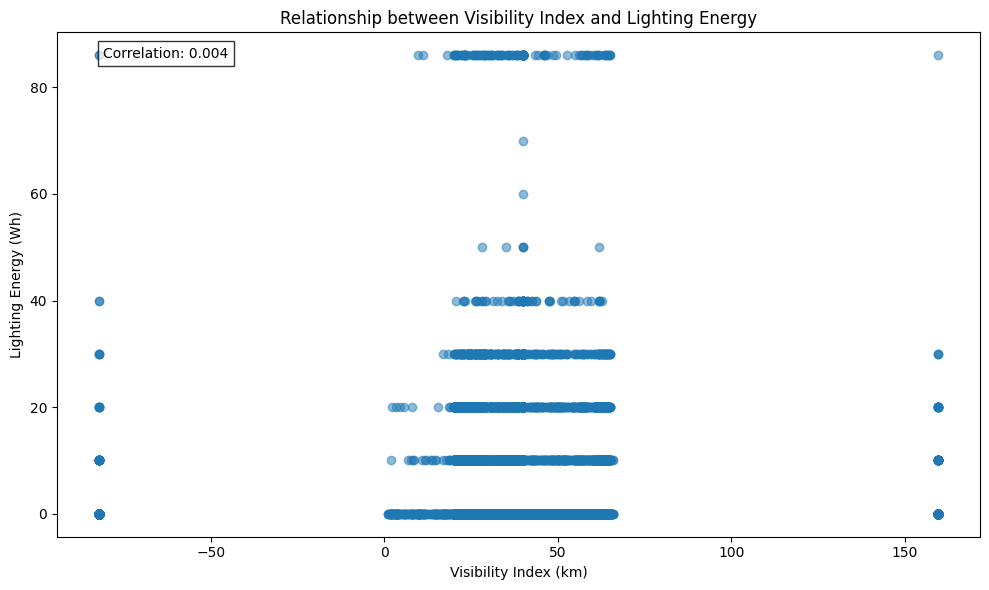

In [44]:
# Create a scatter plot of lighting energy vs visibility index
plt.figure(figsize=(10, 6))
plt.scatter(df['visibility_index'], df['lighting_energy'], alpha=0.5)
plt.title('Relationship between Visibility Index and Lighting Energy')
plt.xlabel('Visibility Index (km)')
plt.ylabel('Lighting Energy (Wh)')

# Calculate and add correlation coefficient
correlation = df['visibility_index'].corr(df['lighting_energy'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


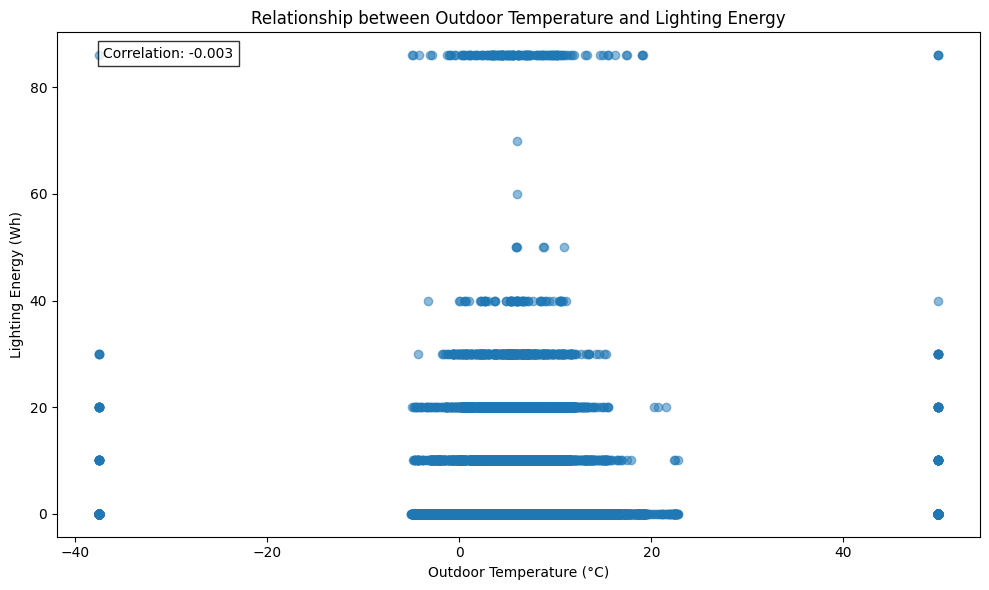

In [45]:
# Create a scatter plot of outdoor temperature vs lighting energy
plt.figure(figsize=(10, 6))
plt.scatter(df['outdoor_temperature'], df['lighting_energy'], alpha=0.5)
plt.title('Relationship between Outdoor Temperature and Lighting Energy')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Lighting Energy (Wh)')

# Calculate and add correlation coefficient
correlation = df['outdoor_temperature'].corr(df['lighting_energy'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


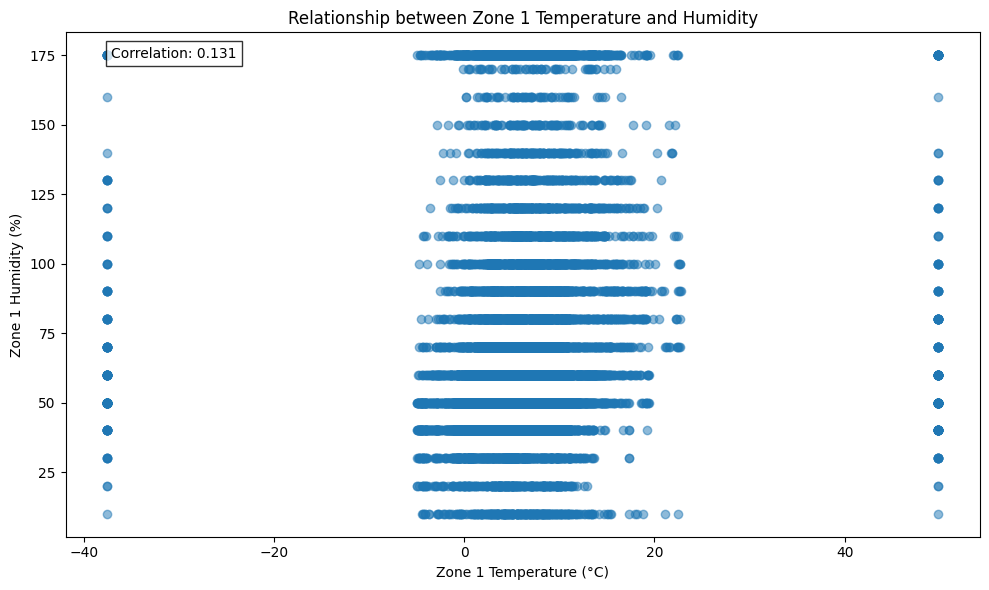

In [64]:
# Create a scatter plot of zone1 temperature vs zone1 humidity
plt.figure(figsize=(10, 6))
plt.scatter(df['outdoor_temperature'], df['equipment_energy_consumption'], alpha=0.5)
plt.title('Relationship between Zone 1 Temperature and Humidity')
plt.xlabel('Zone 1 Temperature (°C)')
plt.ylabel('Zone 1 Humidity (%)')

# Calculate and add correlation coefficient
correlation = df['equipment_energy_consumption'].corr(df['outdoor_temperature'], method="kendall")
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


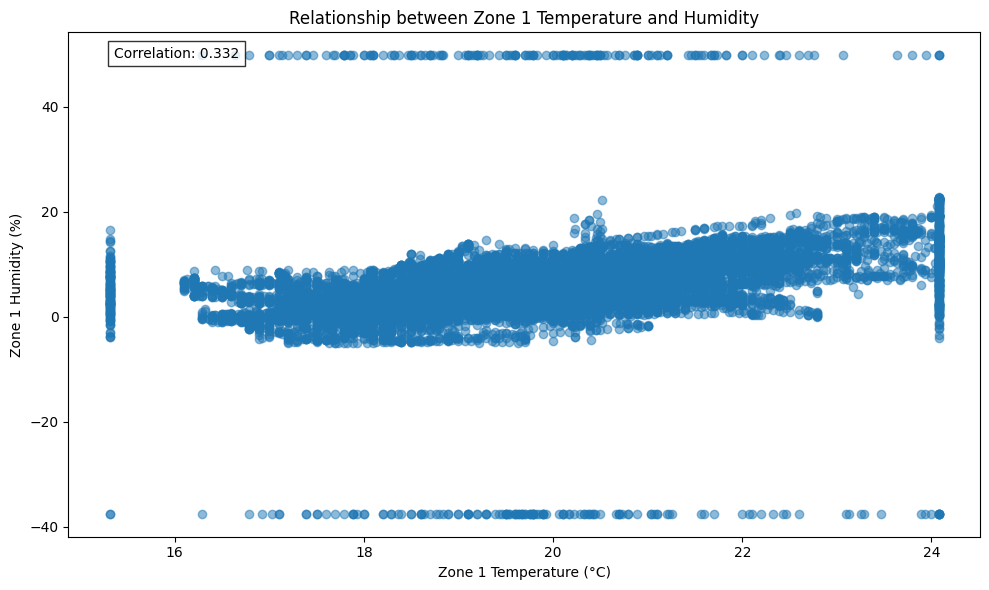

In [58]:
# Create a scatter plot of zone1 temperature vs zone1 humidity
plt.figure(figsize=(10, 6))
plt.scatter(df['zone2_temperature'], df['outdoor_temperature'], alpha=0.5)
plt.title('Relationship between Zone 1 Temperature and Humidity')
plt.xlabel('Zone 1 Temperature (°C)')
plt.ylabel('Zone 1 Humidity (%)')

# Calculate and add correlation coefficient
correlation = df['zone2_temperature'].corr(df['outdoor_temperature'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

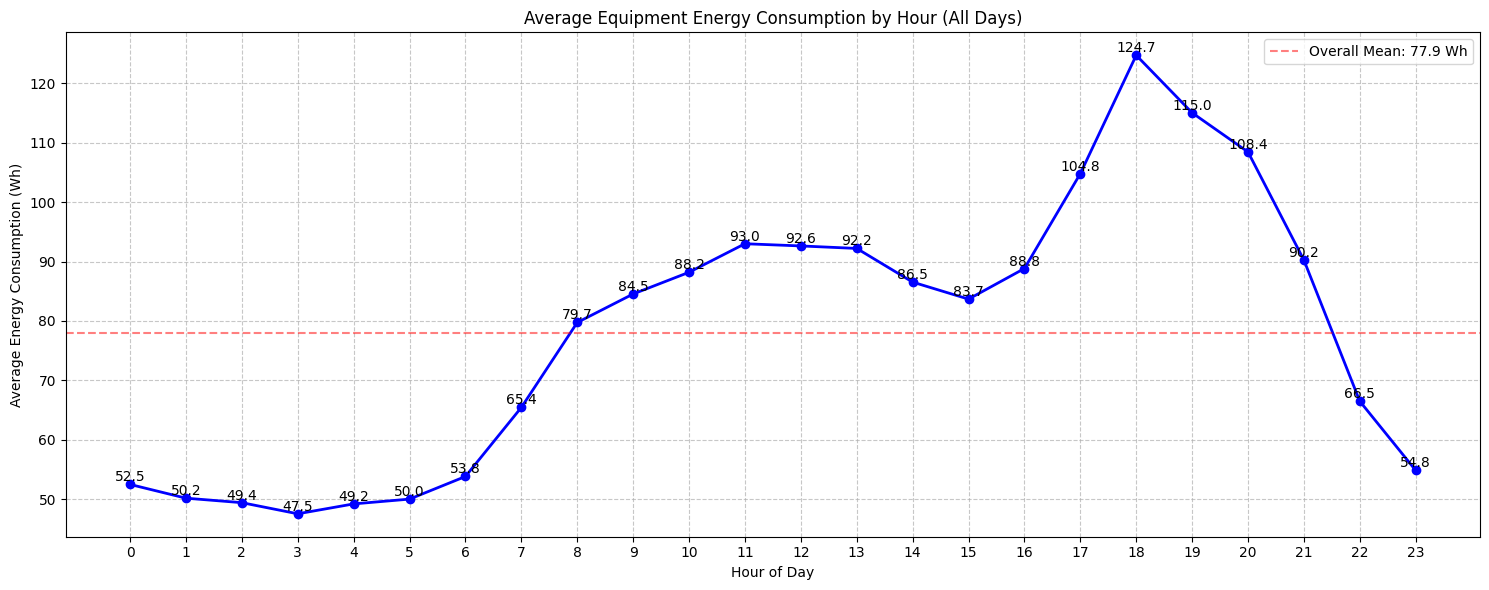

In [72]:
# Extract hour from timestamp and create a new column
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

# Group by hour and calculate mean energy consumption for all days
hourly_energy = df.groupby('hour')['equipment_energy_consumption'].mean().reset_index()

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(hourly_energy['hour'], hourly_energy['equipment_energy_consumption'], 
         marker='o', linestyle='-', linewidth=2, color='blue')

# Customize the plot
plt.title('Average Equipment Energy Consumption by Hour (All Days)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Consumption (Wh)')
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to show all hours
plt.xticks(range(0, 24))

# Add value labels on top of each point
for x, y in zip(hourly_energy['hour'], hourly_energy['equipment_energy_consumption']):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom')

# Add a horizontal line for the overall mean
overall_mean = df['equipment_energy_consumption'].mean()
plt.axhline(y=overall_mean, color='r', linestyle='--', alpha=0.5, 
            label=f'Overall Mean: {overall_mean:.1f} Wh')
plt.legend()

plt.tight_layout()
plt.show()



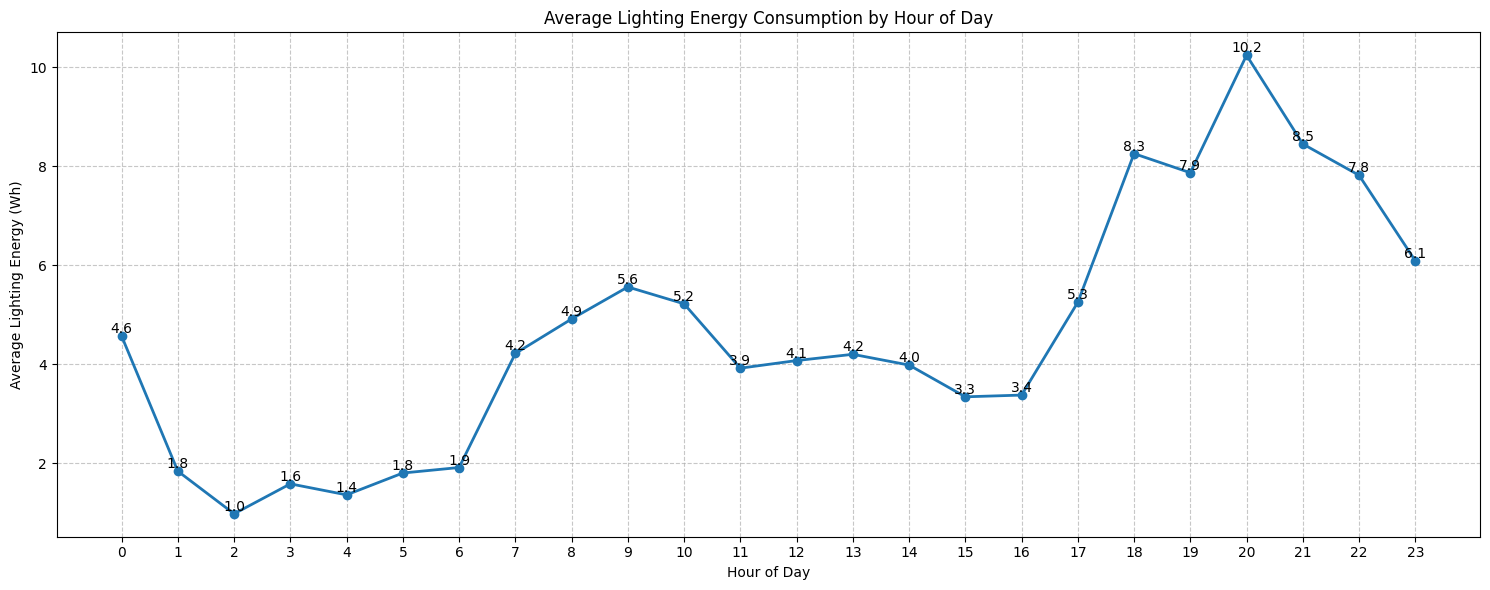

In [69]:
# Extract hour from timestamp and create a new column
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

# Group by hour and calculate mean lighting energy
hourly_lighting = df.groupby('hour')['lighting_energy'].mean().reset_index()

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(hourly_lighting['hour'], hourly_lighting['lighting_energy'], 
         marker='o', linestyle='-', linewidth=2)

# Customize the plot
plt.title('Average Lighting Energy Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Lighting Energy (Wh)')
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to show all hours
plt.xticks(range(0, 24))

# Add value labels on top of each point
for x, y in zip(hourly_lighting['hour'], hourly_lighting['lighting_energy']):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


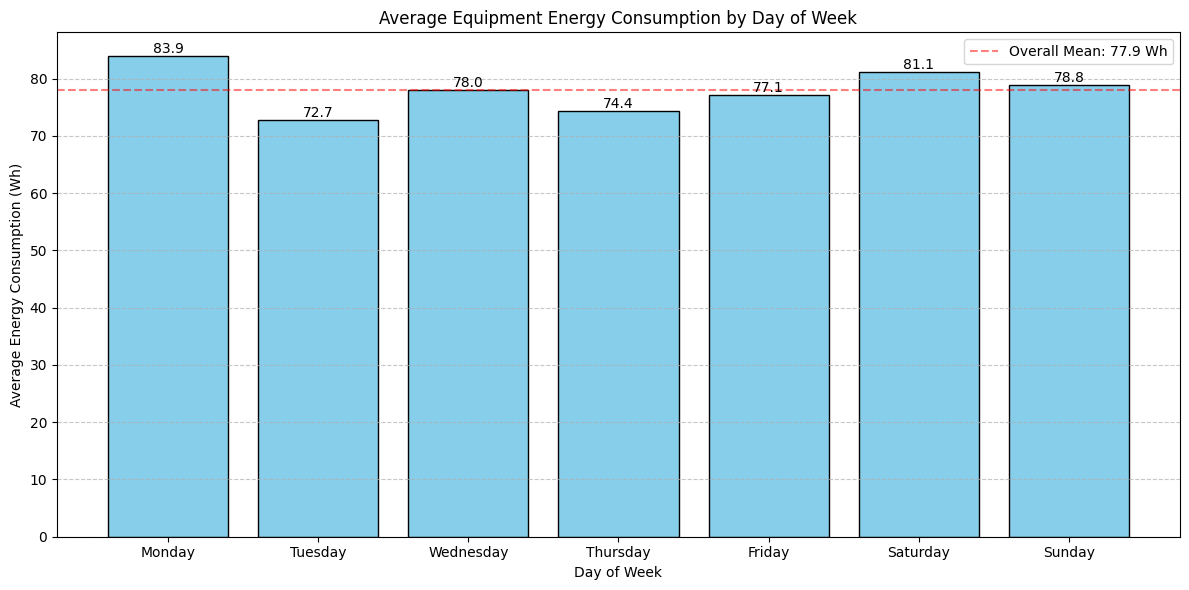

In [73]:
# Extract day of week from timestamp and create a new column
df['day_of_week'] = pd.to_datetime(df['timestamp']).dt.day_name()

# Group by day of week and calculate mean equipment energy consumption
daily_energy = df.groupby('day_of_week')['equipment_energy_consumption'].mean().reset_index()

# Define the order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_energy['day_of_week'] = pd.Categorical(daily_energy['day_of_week'], categories=day_order, ordered=True)
daily_energy = daily_energy.sort_values('day_of_week')

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(daily_energy['day_of_week'], daily_energy['equipment_energy_consumption'], 
        color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Average Equipment Energy Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Energy Consumption (Wh)')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Add value labels on top of each bar
for i, v in enumerate(daily_energy['equipment_energy_consumption']):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

# Add a horizontal line for the overall mean
overall_mean = df['equipment_energy_consumption'].mean()
plt.axhline(y=overall_mean, color='r', linestyle='--', alpha=0.5, 
            label=f'Overall Mean: {overall_mean:.1f} Wh')
plt.legend()

plt.tight_layout()
plt.show()


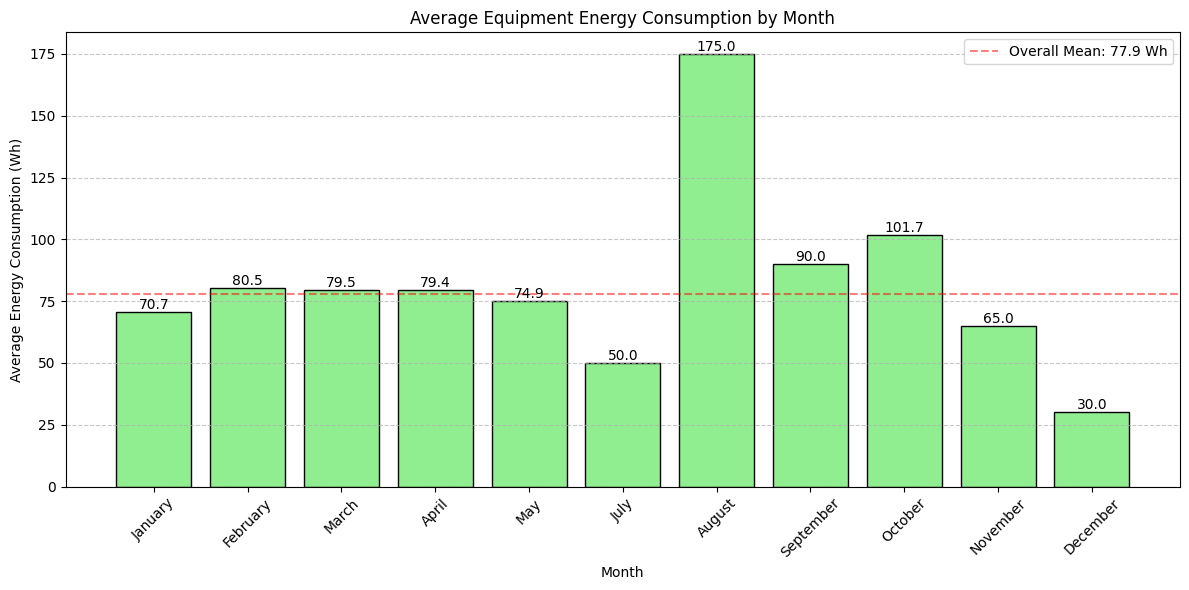

In [74]:
# Extract month from timestamp and create a new column
df['month'] = pd.to_datetime(df['timestamp']).dt.month_name()

# Group by month and calculate mean equipment energy consumption
monthly_energy = df.groupby('month')['equipment_energy_consumption'].mean().reset_index()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_energy['month'] = pd.Categorical(monthly_energy['month'], categories=month_order, ordered=True)
monthly_energy = monthly_energy.sort_values('month')

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(monthly_energy['month'], monthly_energy['equipment_energy_consumption'], 
        color='lightgreen', edgecolor='black')

# Customize the plot
plt.title('Average Equipment Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption (Wh)')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(monthly_energy['equipment_energy_consumption']):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

# Add a horizontal line for the overall mean
overall_mean = df['equipment_energy_consumption'].mean()
plt.axhline(y=overall_mean, color='r', linestyle='--', alpha=0.5, 
            label=f'Overall Mean: {overall_mean:.1f} Wh')
plt.legend()

plt.tight_layout()
plt.show()


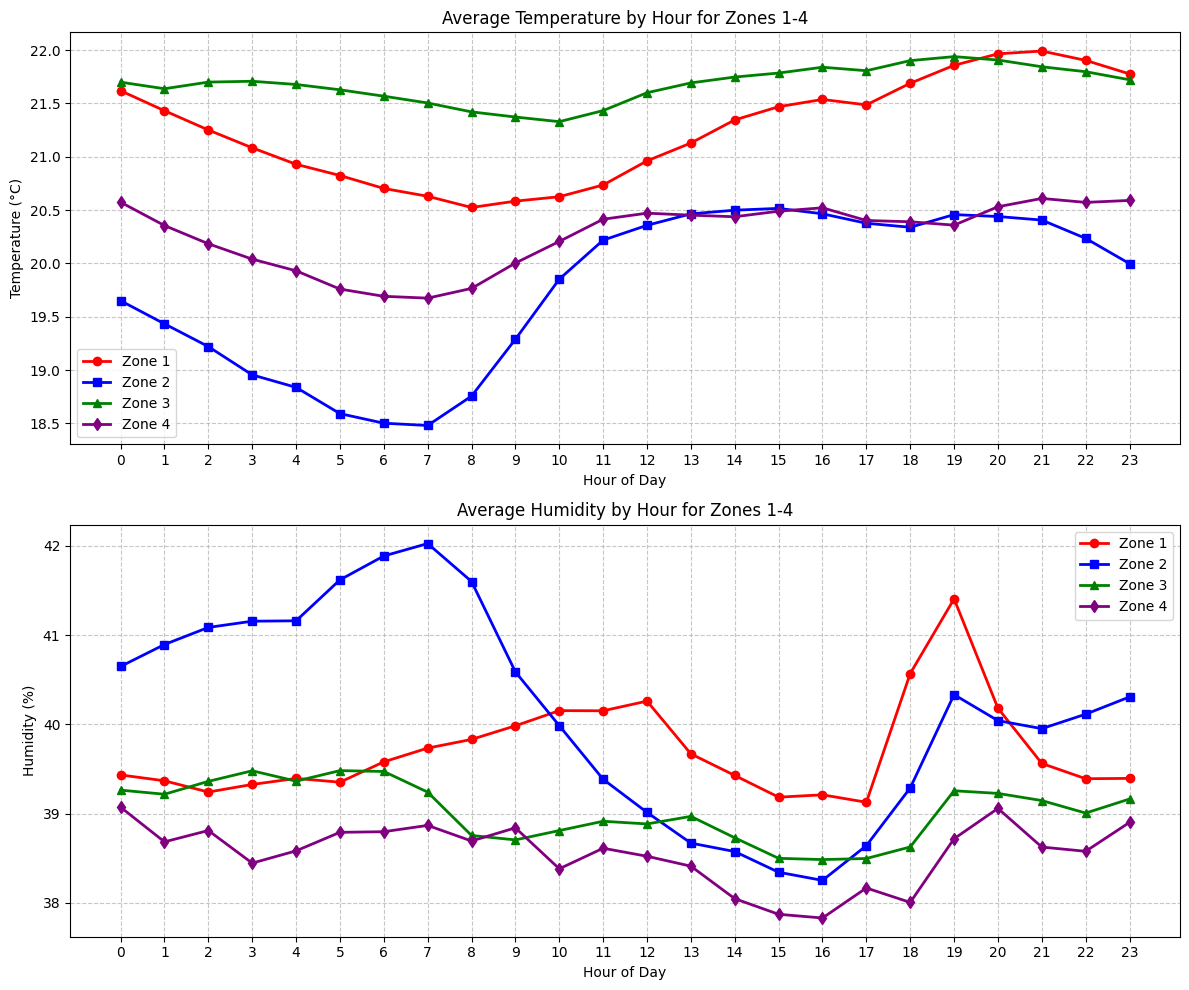

In [79]:
# Extract hour from timestamp and create a new column
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

# Group by hour and calculate mean temperature and humidity for zones 1-4
hourly_zones = df.groupby('hour').agg({
    'zone1_temperature': 'mean',
    'zone1_humidity': 'mean',
    'zone2_temperature': 'mean', 
    'zone2_humidity': 'mean',
    'zone3_temperature': 'mean',
    'zone3_humidity': 'mean',
    'zone4_temperature': 'mean',
    'zone4_humidity': 'mean'
}).reset_index()

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot temperatures
ax1.plot(hourly_zones['hour'], hourly_zones['zone1_temperature'], 
         marker='o', color='red', label='Zone 1', linewidth=2)
ax1.plot(hourly_zones['hour'], hourly_zones['zone2_temperature'],
         marker='s', color='blue', label='Zone 2', linewidth=2)
ax1.plot(hourly_zones['hour'], hourly_zones['zone3_temperature'],
         marker='^', color='green', label='Zone 3', linewidth=2)
ax1.plot(hourly_zones['hour'], hourly_zones['zone4_temperature'],
         marker='d', color='purple', label='Zone 4', linewidth=2)

# Customize temperature subplot
ax1.set_title('Average Temperature by Hour for Zones 1-4')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Temperature (°C)')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xticks(range(0, 24))
ax1.legend()

# Plot humidities
ax2.plot(hourly_zones['hour'], hourly_zones['zone1_humidity'],
         marker='o', color='red', label='Zone 1', linewidth=2)
ax2.plot(hourly_zones['hour'], hourly_zones['zone2_humidity'],
         marker='s', color='blue', label='Zone 2', linewidth=2)
ax2.plot(hourly_zones['hour'], hourly_zones['zone3_humidity'],
         marker='^', color='green', label='Zone 3', linewidth=2)
ax2.plot(hourly_zones['hour'], hourly_zones['zone4_humidity'],
         marker='d', color='purple', label='Zone 4', linewidth=2)

# Customize humidity subplot
ax2.set_title('Average Humidity by Hour for Zones 1-4')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Humidity (%)')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_xticks(range(0, 24))
ax2.legend()

plt.tight_layout()
plt.show()




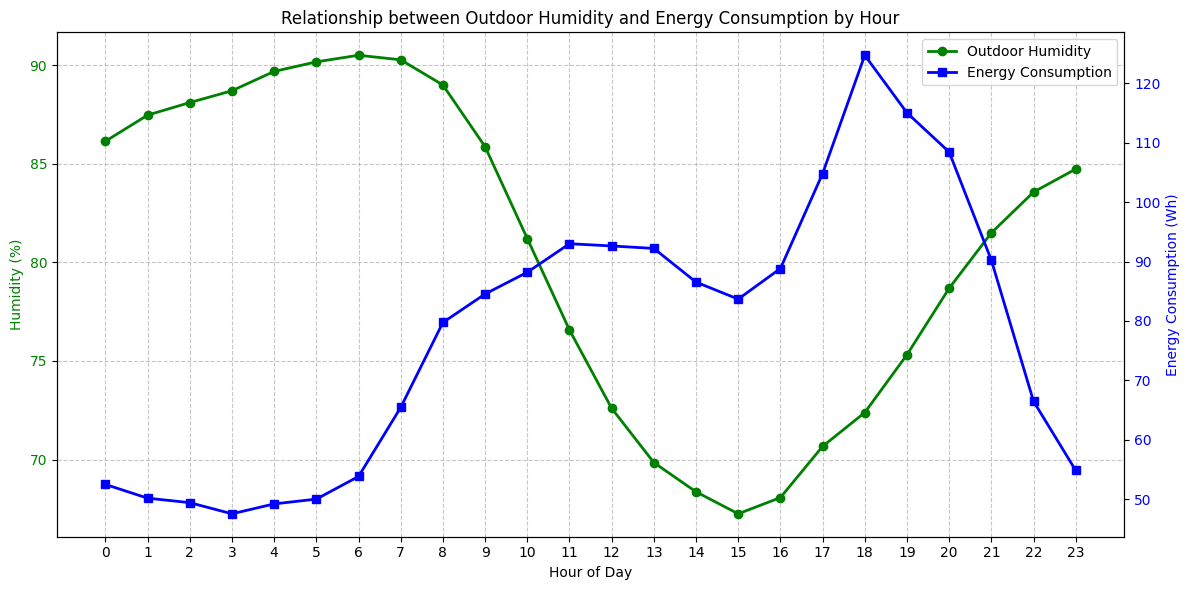

In [81]:
# Create hourly averages for outdoor humidity and energy consumption
hourly_outdoor = df.groupby(df['timestamp'].dt.hour).agg({
    'outdoor_humidity': 'mean',
    'equipment_energy_consumption': 'mean'
}).reset_index()

# Create the plot
plt.figure(figsize=(12, 6))

# Plot outdoor humidity
ax1 = plt.gca()
ax1.plot(hourly_outdoor['timestamp'], hourly_outdoor['outdoor_humidity'], 
         color='green', marker='o', label='Outdoor Humidity', linewidth=2)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Humidity (%)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xticks(range(0, 24))

# Create second y-axis for energy consumption
ax2 = ax1.twinx()
ax2.plot(hourly_outdoor['timestamp'], hourly_outdoor['equipment_energy_consumption'],
         color='blue', marker='s', label='Energy Consumption', linewidth=2)
ax2.set_ylabel('Energy Consumption (Wh)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and legend
plt.title('Relationship between Outdoor Humidity and Energy Consumption by Hour')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()


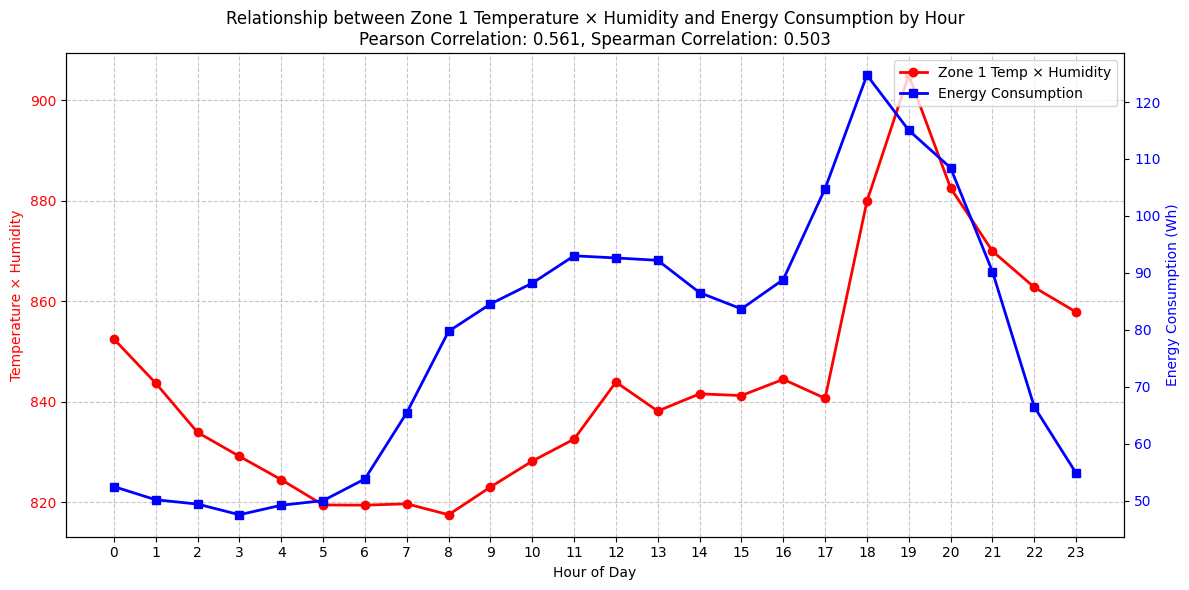

Zone 1 - Pearson Correlation: 0.561
Zone 1 - Spearman Correlation: 0.503




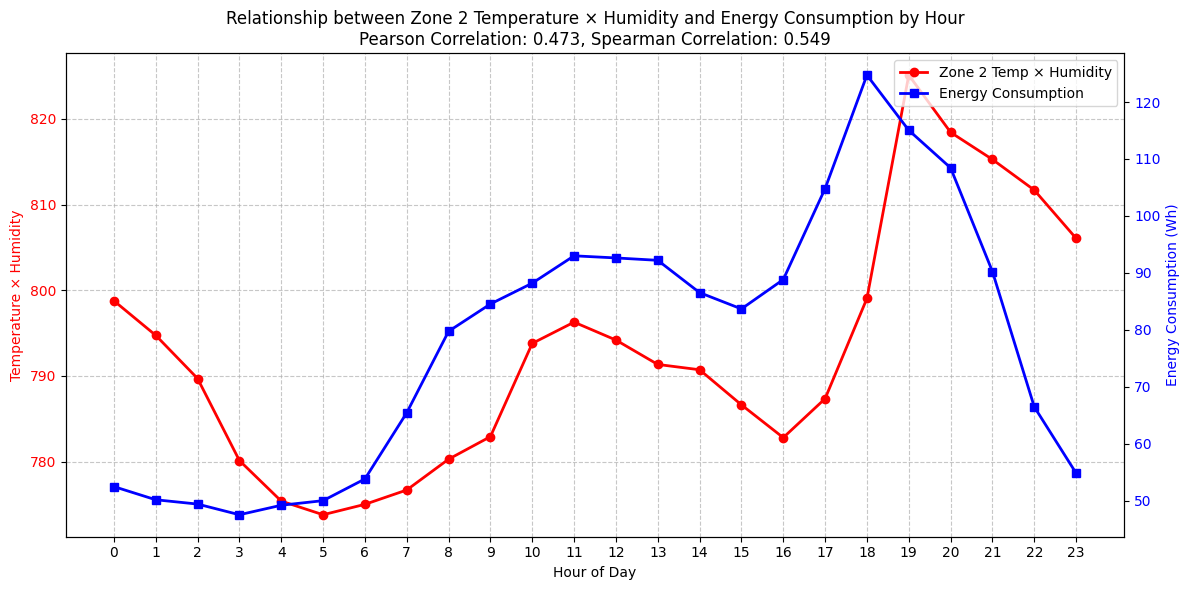

Zone 2 - Pearson Correlation: 0.473
Zone 2 - Spearman Correlation: 0.549




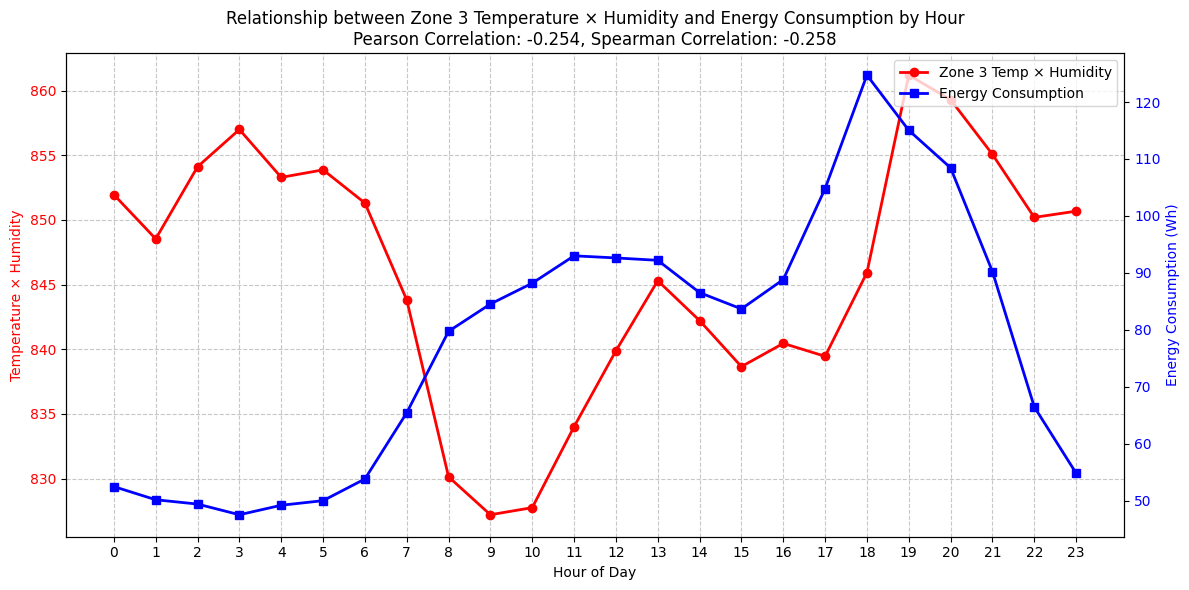

Zone 3 - Pearson Correlation: -0.254
Zone 3 - Spearman Correlation: -0.258




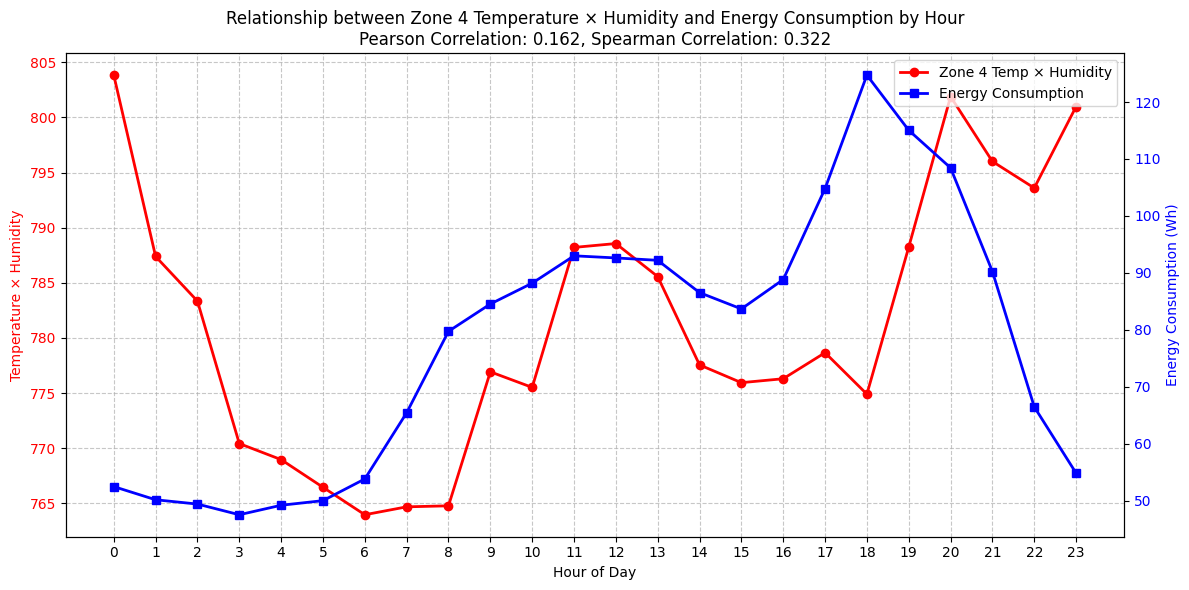

Zone 4 - Pearson Correlation: 0.162
Zone 4 - Spearman Correlation: 0.322




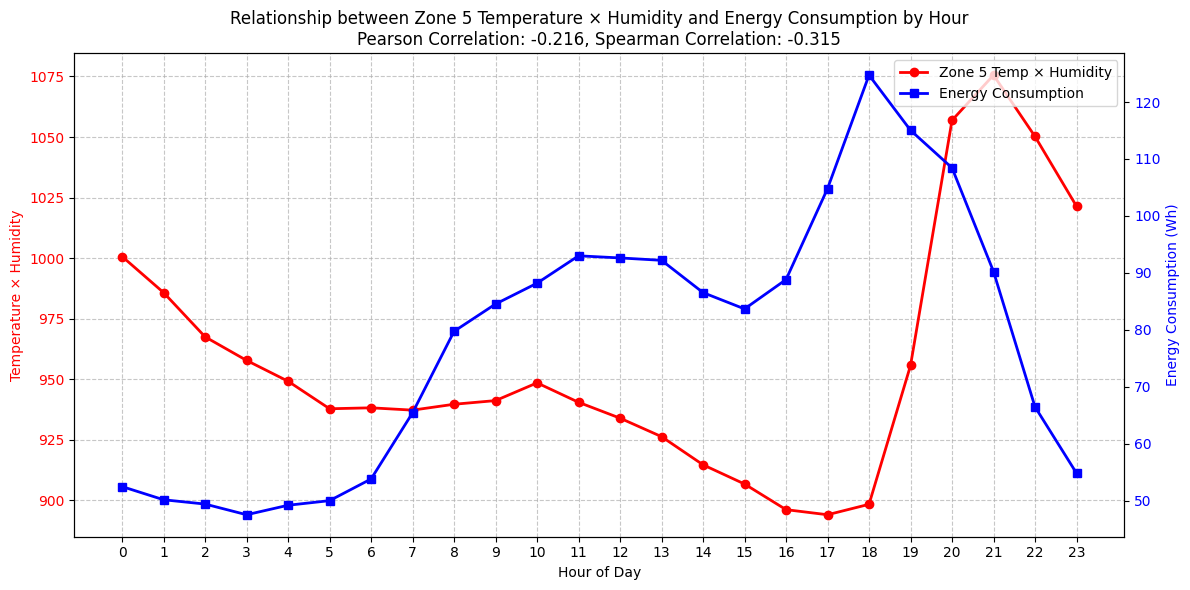

Zone 5 - Pearson Correlation: -0.216
Zone 5 - Spearman Correlation: -0.315




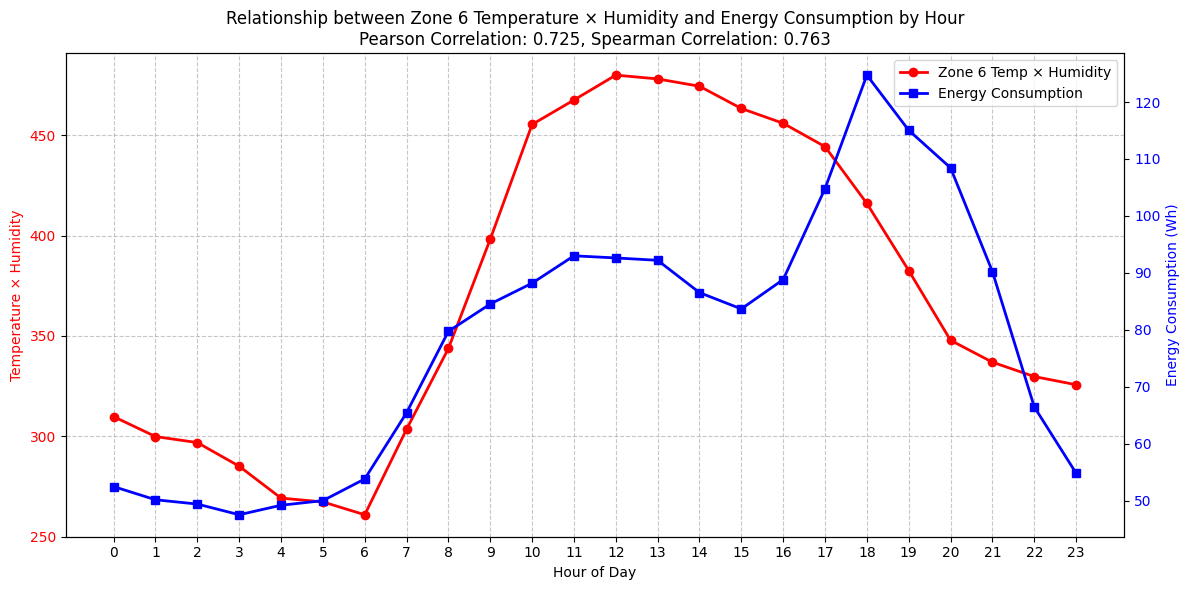

Zone 6 - Pearson Correlation: 0.725
Zone 6 - Spearman Correlation: 0.763




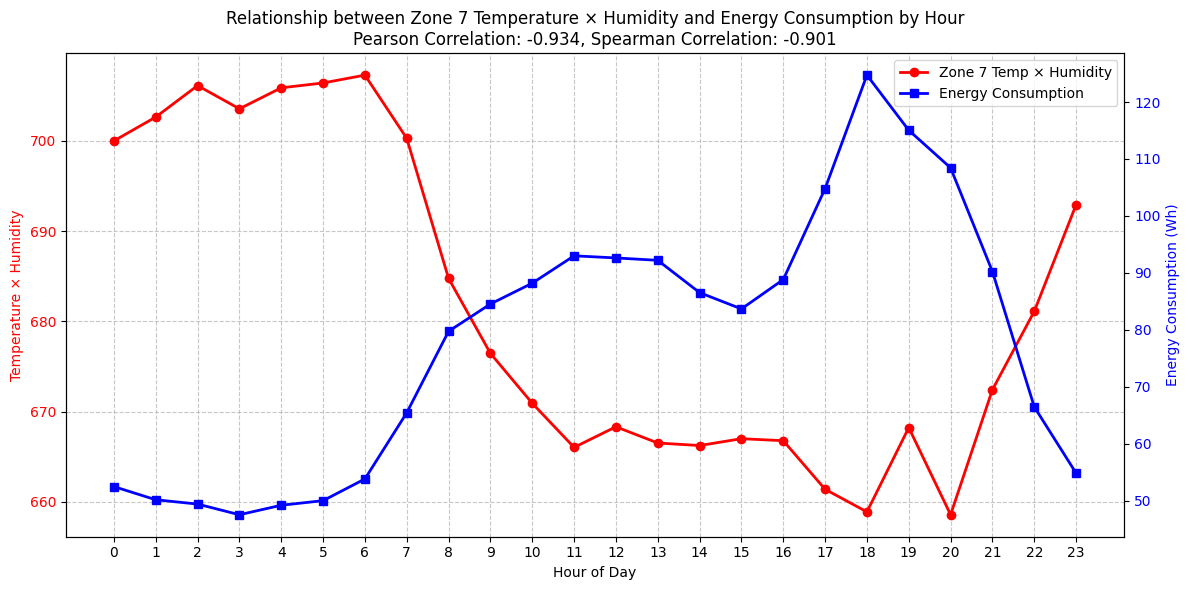

Zone 7 - Pearson Correlation: -0.934
Zone 7 - Spearman Correlation: -0.901




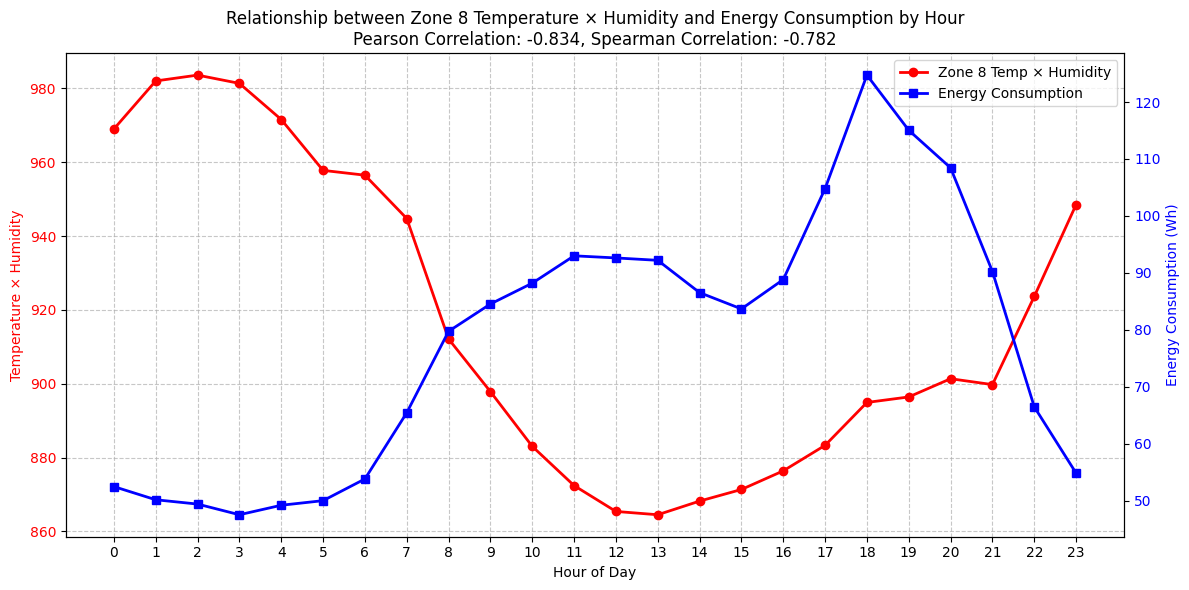

Zone 8 - Pearson Correlation: -0.834
Zone 8 - Spearman Correlation: -0.782




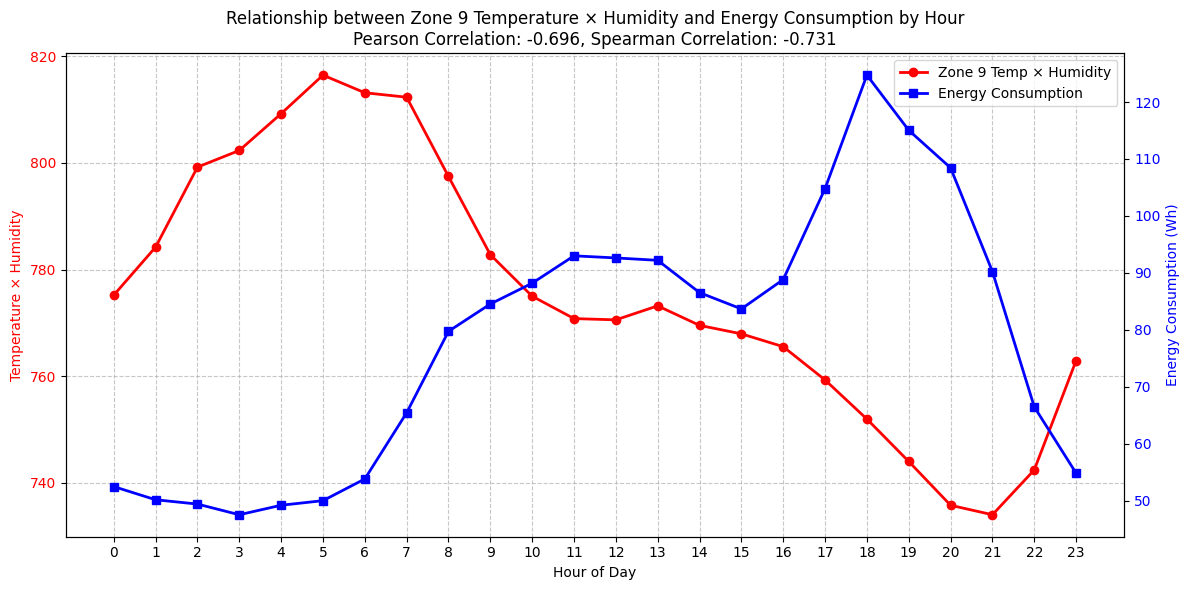

Zone 9 - Pearson Correlation: -0.696
Zone 9 - Spearman Correlation: -0.731




In [84]:
# Create a function to analyze zone data
def analyze_zone(zone_num):
    # Calculate hourly averages for zone temperature, humidity, and energy consumption
    hourly_zone = df.groupby(df['timestamp'].dt.hour).agg({
        f'zone{zone_num}_temperature': 'mean',
        f'zone{zone_num}_humidity': 'mean',
        'equipment_energy_consumption': 'mean'
    }).reset_index()

    # Calculate the product of temperature and humidity
    hourly_zone['temp_humidity_product'] = hourly_zone[f'zone{zone_num}_temperature'] * hourly_zone[f'zone{zone_num}_humidity']

    # Calculate correlations
    pearson_corr = hourly_zone['temp_humidity_product'].corr(hourly_zone['equipment_energy_consumption'])
    spearman_corr = hourly_zone['temp_humidity_product'].corr(hourly_zone['equipment_energy_consumption'], method='spearman')

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot temperature-humidity product
    ax1 = plt.gca()
    ax1.plot(hourly_zone['timestamp'], hourly_zone['temp_humidity_product'], 
             color='red', marker='o', label=f'Zone {zone_num} Temp × Humidity', linewidth=2)
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Temperature × Humidity', color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.set_xticks(range(0, 24))

    # Create second y-axis for energy consumption
    ax2 = ax1.twinx()
    ax2.plot(hourly_zone['timestamp'], hourly_zone['equipment_energy_consumption'],
             color='blue', marker='s', label='Energy Consumption', linewidth=2)
    ax2.set_ylabel('Energy Consumption (Wh)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Add title and legend
    plt.title(f'Relationship between Zone {zone_num} Temperature × Humidity and Energy Consumption by Hour\n'
              f'Pearson Correlation: {pearson_corr:.3f}, Spearman Correlation: {spearman_corr:.3f}')
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()

    # Print correlation values
    print(f"Zone {zone_num} - Pearson Correlation: {pearson_corr:.3f}")
    print(f"Zone {zone_num} - Spearman Correlation: {spearman_corr:.3f}")
    print("\n" + "="*50 + "\n")

# Analyze all zones from 1 to 9
for zone in range(1, 10):
    analyze_zone(zone)


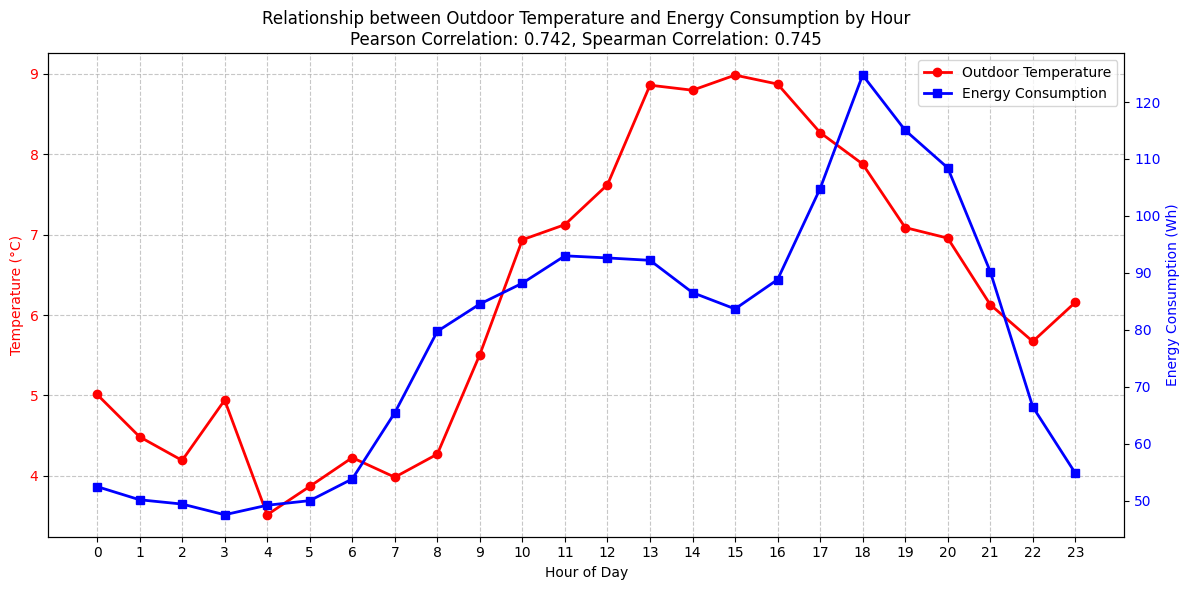

Outdoor Temperature - Pearson Correlation: 0.742
Outdoor Temperature - Spearman Correlation: 0.745


In [85]:
# Calculate hourly averages for outdoor temperature and energy consumption
hourly_data = df.groupby(df['timestamp'].dt.hour).agg({
    'outdoor_temperature': 'mean',
    'equipment_energy_consumption': 'mean'
}).reset_index()

# Calculate correlations
pearson_corr = hourly_data['outdoor_temperature'].corr(hourly_data['equipment_energy_consumption'])
spearman_corr = hourly_data['outdoor_temperature'].corr(hourly_data['equipment_energy_consumption'], method='spearman')

# Create the plot
plt.figure(figsize=(12, 6))

# Plot outdoor temperature
ax1 = plt.gca()
ax1.plot(hourly_data['timestamp'], hourly_data['outdoor_temperature'], 
         color='red', marker='o', label='Outdoor Temperature', linewidth=2)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xticks(range(0, 24))

# Create second y-axis for energy consumption
ax2 = ax1.twinx()
ax2.plot(hourly_data['timestamp'], hourly_data['equipment_energy_consumption'],
         color='blue', marker='s', label='Energy Consumption', linewidth=2)
ax2.set_ylabel('Energy Consumption (Wh)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and legend
plt.title(f'Relationship between Outdoor Temperature and Energy Consumption by Hour\n'
          f'Pearson Correlation: {pearson_corr:.3f}, Spearman Correlation: {spearman_corr:.3f}')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Print correlation values
print(f"Outdoor Temperature - Pearson Correlation: {pearson_corr:.3f}")
print(f"Outdoor Temperature - Spearman Correlation: {spearman_corr:.3f}")


Outdoor Humidity - Pearson Correlation: -0.743
Outdoor Humidity - Spearman Correlation: -0.731
Atmospheric Pressure - Pearson Correlation: 0.260
Atmospheric Pressure - Spearman Correlation: 0.342
Wind Speed - Pearson Correlation: 0.573
Wind Speed - Spearman Correlation: 0.666
Visibility Index - Pearson Correlation: -0.245
Visibility Index - Spearman Correlation: -0.363


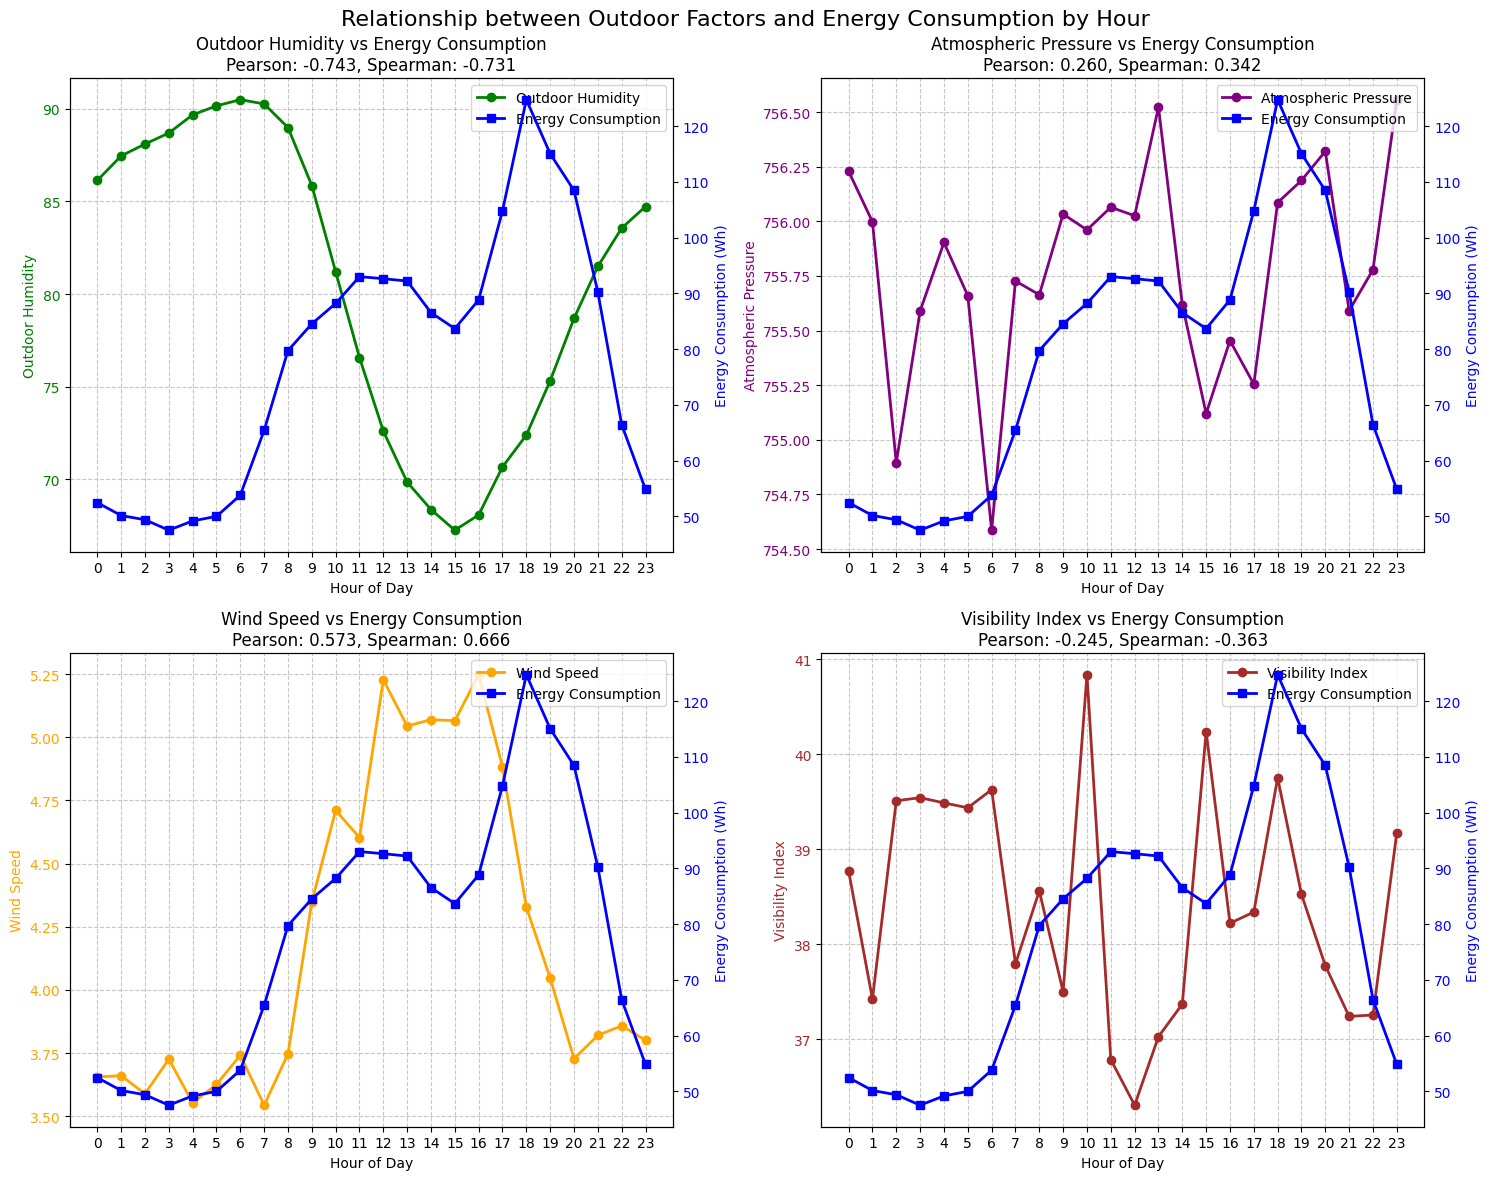

In [86]:
# Create a figure with subplots for each outdoor factor
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Relationship between Outdoor Factors and Energy Consumption by Hour', fontsize=16)

# List of outdoor factors to analyze
outdoor_factors = ['outdoor_humidity', 'atmospheric_pressure', 'wind_speed', 'visibility_index']
titles = ['Outdoor Humidity', 'Atmospheric Pressure', 'Wind Speed', 'Visibility Index']
colors = ['green', 'purple', 'orange', 'brown']

# Calculate hourly averages for each factor
for idx, (factor, title, color) in enumerate(zip(outdoor_factors, titles, colors)):
    row = idx // 2
    col = idx % 2
    
    # Calculate hourly averages
    hourly_data = df.groupby(df['timestamp'].dt.hour).agg({
        factor: 'mean',
        'equipment_energy_consumption': 'mean'
    }).reset_index()
    
    # Calculate correlations
    pearson_corr = hourly_data[factor].corr(hourly_data['equipment_energy_consumption'])
    spearman_corr = hourly_data[factor].corr(hourly_data['equipment_energy_consumption'], method='spearman')
    
    # Plot on the corresponding subplot
    ax1 = axes[row, col]
    ax1.plot(hourly_data['timestamp'], hourly_data[factor], 
             color=color, marker='o', label=title, linewidth=2)
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel(f'{title}', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.set_xticks(range(0, 24))
    
    # Create second y-axis for energy consumption
    ax2 = ax1.twinx()
    ax2.plot(hourly_data['timestamp'], hourly_data['equipment_energy_consumption'],
             color='blue', marker='s', label='Energy Consumption', linewidth=2)
    ax2.set_ylabel('Energy Consumption (Wh)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    
    # Add title and legend
    ax1.set_title(f'{title} vs Energy Consumption\n'
                  f'Pearson: {pearson_corr:.3f}, Spearman: {spearman_corr:.3f}')
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    # Print correlation values
    print(f"{title} - Pearson Correlation: {pearson_corr:.3f}")
    print(f"{title} - Spearman Correlation: {spearman_corr:.3f}")

plt.tight_layout()
plt.show()
